In [1]:
import pandas as pd 
import numpy as np

뭔가 전반적으로 종모양 
- 이미 한번 정규화됨 
- quantile로 모든 feature, 와 target을 재생성 
- heatmap 찍어보기

- 해당 time의 다른 모든 symbol의 평균값과 feauture의 관계 봐보기


----------

- 뭔가 date_id 기반으로 쪼개고 싶은데 어떻게 해야할지 모르겠음
- responder가 time_id가 변할때 조금 변하면 date_id 기반으로 쪼개도 될듯한데 responder가 요동침
- 시장 전반적인 정보를 나타내는 feature가 하나쯤 필요할듯 한데..

In [2]:
df = pd.read_parquet('jane-street-real-time-market-data-forecasting/train.parquet/partition_id=3/part-0.parquet')

In [30]:
df.loc[:,'responder_6'].reset_index(drop=True)

0          1.896684
1         -0.045841
2         -0.066627
3         -0.013541
4          1.310747
             ...   
4016779    1.889881
4016780    1.092061
4016781   -0.228207
4016782   -0.300739
4016783    0.244911
Name: responder_6, Length: 4016784, dtype: float32

<Axes: >

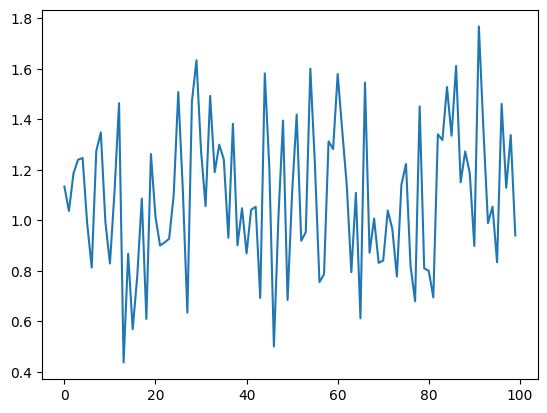

In [34]:
df.loc[:,'feature_00'].reset_index(drop=True)[:100].plot()

In [ ]:
# feature 컬럼 선택
feature_cols = df.columns[df.columns.str.contains('feature')].tolist()

# 날짜 정렬 및 인덱스 설정
df = df.sort_values('date_id')

# 모든 feature 컬럼에 대해 한번에 계산
means_by_date = df.groupby('date_id')[feature_cols].mean()

# 이전 날짜의 평균값들을 shift해서 한번에 계산
shifted_means = means_by_date.shift(1)

# 각 행의 date_id에 해당하는 이전 평균값을 매핑
for feature_col in feature_cols:
    new_col_name = f"{feature_col}_universe_mean_window_1"
    df[new_col_name] = df[feature_col] - df['date_id'].map(shifted_means[feature_col])

In [20]:
means_by_date

feature_00  feature_01  feature_02  feature_03  feature_04  \
date_id                                                               
510        1.117974    0.011035    1.124665    1.118905   -0.037838   
511        1.105542   -0.164262    1.114394    1.117469   -0.000974   
512        1.124626    0.121283    1.125118    1.125196   -0.035117   
513        1.030316    0.436172    0.998115    1.011112    0.121987   
514        0.929961   -0.166222    0.935803    0.935391   -0.107148   
...             ...         ...         ...         ...         ...   
675        0.170316   -0.336433    0.193746    0.189615   -0.106913   
676        0.097459    0.392922    0.074697    0.085441    0.197323   
677        0.024234   -0.084571    0.031676    0.030005   -0.001634   
678        0.005131   -0.347425    0.039284    0.028013   -0.137401   
679       -0.035781   -0.456018    0.010702   -0.001936   -0.205054   

         feature_05  feature_06  feature_07  feature_08  feature_09  ...  \
date_id                                                              ...   
510        0.001853    0.004429    0.018322    0.326899   34.464286  ...   
511       -0.739308   -0.143465   -0.402484    0.842689   33.629630  ...   
512       -0.011870    0.006422   -0.031873   -0.014553   34.464286  ...   
513        0.234673    0.077854    0.196651    0.646661   34.464286  ...   
514        0.386101    0.062163    0.142702   -0.696564   34.464286  ...   
...             ...         ...         ...         ...         ...  ...   
675        0.027726   -0.022281    0.013391   -0.279205   34.689655  ...   
676        0.502048    0.100954    0.265548    0.046584   34.689655  ...   
677       -0.227269   -0.025876   -0.075914    0.519405   34.689655  ...   
678       -0.303057   -0.010204   -0.032508    0.732629   34.689655  ...   
679        0.113505   -0.045389   -0.038312   -1.064158   34.689655  ...   

         feature_69  feature_70  feature_71  feature_72  feature_73  \
date_id                                                               
510       -0.109145   -0.248270   -0.073330   -0.144108    0.094743   
511        0.045570   -0.187475   -0.060310   -0.110818   -0.007148   
512        0.104416    0.100741    0.053257    0.101967    0.074401   
513        0.284461    0.397771    0.168664    0.318545    0.155283   
514       -0.112836   -0.077144   -0.022699   -0.044186    0.465856   
...             ...         ...         ...         ...         ...   
675        0.099066    0.131319    0.059143    0.109987    0.158741   
676       -0.047573    0.059570    0.031058    0.058199    0.157785   
677       -0.143078   -0.197576   -0.101133   -0.174476    0.177521   
678        0.110191    0.006710    0.009281    0.005756    0.071099   
679        0.085765    0.202607    0.049146    0.096849    0.344136   

         feature_74  feature_75  feature_76  feature_77  feature_78  
date_id                                                              
510        0.070309    0.047098    0.030146    0.063516    0.047238  
511       -0.042214   -0.002684   -0.031787    0.001582   -0.030496  
512        0.082310    0.050789    0.058642    0.061706    0.067470  
513        0.098368    0.160110    0.112076    0.159192    0.111550  
514        0.494488    0.370798    0.398476    0.380810    0.407949  
...             ...         ...         ...         ...         ...  
675        0.146434    0.120998    0.110075    0.132335    0.123838  
676        0.152280    0.144586    0.139021    0.144379    0.137880  
677        0.165933    0.116976    0.109511    0.153617    0.142476  
678        0.042398    0.082190    0.056532    0.070035    0.044783  
679        0.418091    0.293450    0.356371    0.303173    0.368176  

[170 rows x 79 columns]

In [19]:
df[['date_id','feature_00', 'feature_00_diff_lag1']]

date_id  feature_00  feature_00_diff_lag1
0            510    1.133465                   NaN
15853        510    1.037008                   NaN
15852        510    1.185870                   NaN
15851        510    1.239681                   NaN
15850        510    1.246653                   NaN
...          ...         ...                   ...
3998063      679    0.611414              0.606283
3998062      679   -0.163667             -0.168798
3998061      679    0.284091              0.278960
3998072      679   -0.157807             -0.162938
4016783      679   -0.265307             -0.270438

[4016784 rows x 3 columns]

In [5]:
import numpy as np
import pandas as pd

def split_into_deciles(df):
    # 작업할 데이터프레임 복사
    result_df = df.copy()
    decile_bounds = {}
    
    feature_columns = df.columns.str.contains('feature')
    responder_columns = df.columns.str.contains('responder')
    
    # 각 컬럼에 대해 처리
    for column_name in df.columns[feature_columns+responder_columns]:
        # 유니크한 값의 개수 확인
        unique_values = df[column_name].nunique()
        
        if unique_values < 10:
            # 유니크한 값이 10개 미만인 경우, 가능한 최대 분위수로 조정
            n_quantiles = min(unique_values, 10)
            labels = [i for i in range(1, n_quantiles)]  # 레이블 개수를 하나 줄임
            
            try:
                # 분위수 계산 및 qcut 적용
                result_df[column_name] = pd.qcut(df[column_name],
                                               q=n_quantiles-1,  # 구간 개수를 하나 줄임
                                               labels=labels,
                                               duplicates='drop')
                
                # 실제 경계값 계산
                quantiles = np.percentile(df[column_name], 
                                        np.linspace(0, 100, n_quantiles))
                
                # 경계값 저장
                decile_bounds[column_name] = {
                    f'{i}': f'{quantiles[i-1]:.2f} ~ {quantiles[i]:.2f}'
                    for i in range(1, n_quantiles)
                }
                
            except ValueError as e:
                # 분할이 불가능한 경우 원본 값 유지
                print(f"Warning: Could not split column {column_name} into quantiles. Error: {e}")
                result_df[column_name] = df[column_name]
                decile_bounds[column_name] = {"1": "Original values retained"}
            
        else:
            # 10개 이상의 유니크한 값이 있는 경우 9개의 구간으로 나눔(10분위수)
            try:
                labels = [i for i in range(1, 10)]  # 9개의 레이블
                
                # qcut 적용
                result_df[column_name] = pd.qcut(df[column_name],
                                               q=9,  # 9개 구간
                                               labels=labels,
                                               duplicates='drop')
                
                # 실제 경계값 계산
                quantiles = np.percentile(df[column_name], 
                                        np.linspace(0, 100, 10))
                
                # 경계값 저장
                decile_bounds[column_name] = {
                    f'{i}': f'{quantiles[i-1]:.2f} ~ {quantiles[i]:.2f}'
                    for i in range(1, 10)
                }
                
            except ValueError as e:
                print(f"Warning: Could not split column {column_name} into quantiles. Error: {e}")
                result_df[column_name] = df[column_name]
                decile_bounds[column_name] = {"1": "Original values retained"}
    
    return result_df, decile_bounds

In [6]:
result_df, decile_bounds = split_into_deciles(df)

In [7]:
corr_matrix = result_df.corr()

/tmp/ipykernel_1262910/262267872.py:17: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distance_matrix.values, method='ward')



Clustering Results:

Cluster 1 (12 features):
Features: feature_73, feature_74, feature_75, feature_76, feature_77, feature_78, feature_73_diff_lag1, feature_74_diff_lag1, feature_75_diff_lag1, feature_76_diff_lag1, feature_77_diff_lag1, feature_78_diff_lag1
Average internal correlation: 0.655

Cluster 2 (10 features):
Features: feature_15, feature_16, feature_17, feature_29, feature_30, feature_15_diff_lag1, feature_16_diff_lag1, feature_17_diff_lag1, feature_29_diff_lag1, feature_30_diff_lag1
Average internal correlation: 0.779

Cluster 3 (2 features):
Features: feature_23, feature_23_diff_lag1
Average internal correlation: 0.988

Cluster 4 (9 features):
Features: weight, feature_20, feature_21, feature_22, feature_31, feature_20_diff_lag1, feature_21_diff_lag1, feature_22_diff_lag1, feature_31_diff_lag1
Average internal correlation: 0.637

Cluster 5 (4 features):
Features: feature_27, feature_28, feature_27_diff_lag1, feature_28_diff_lag1
Average internal correlation: 0.868

Cluste

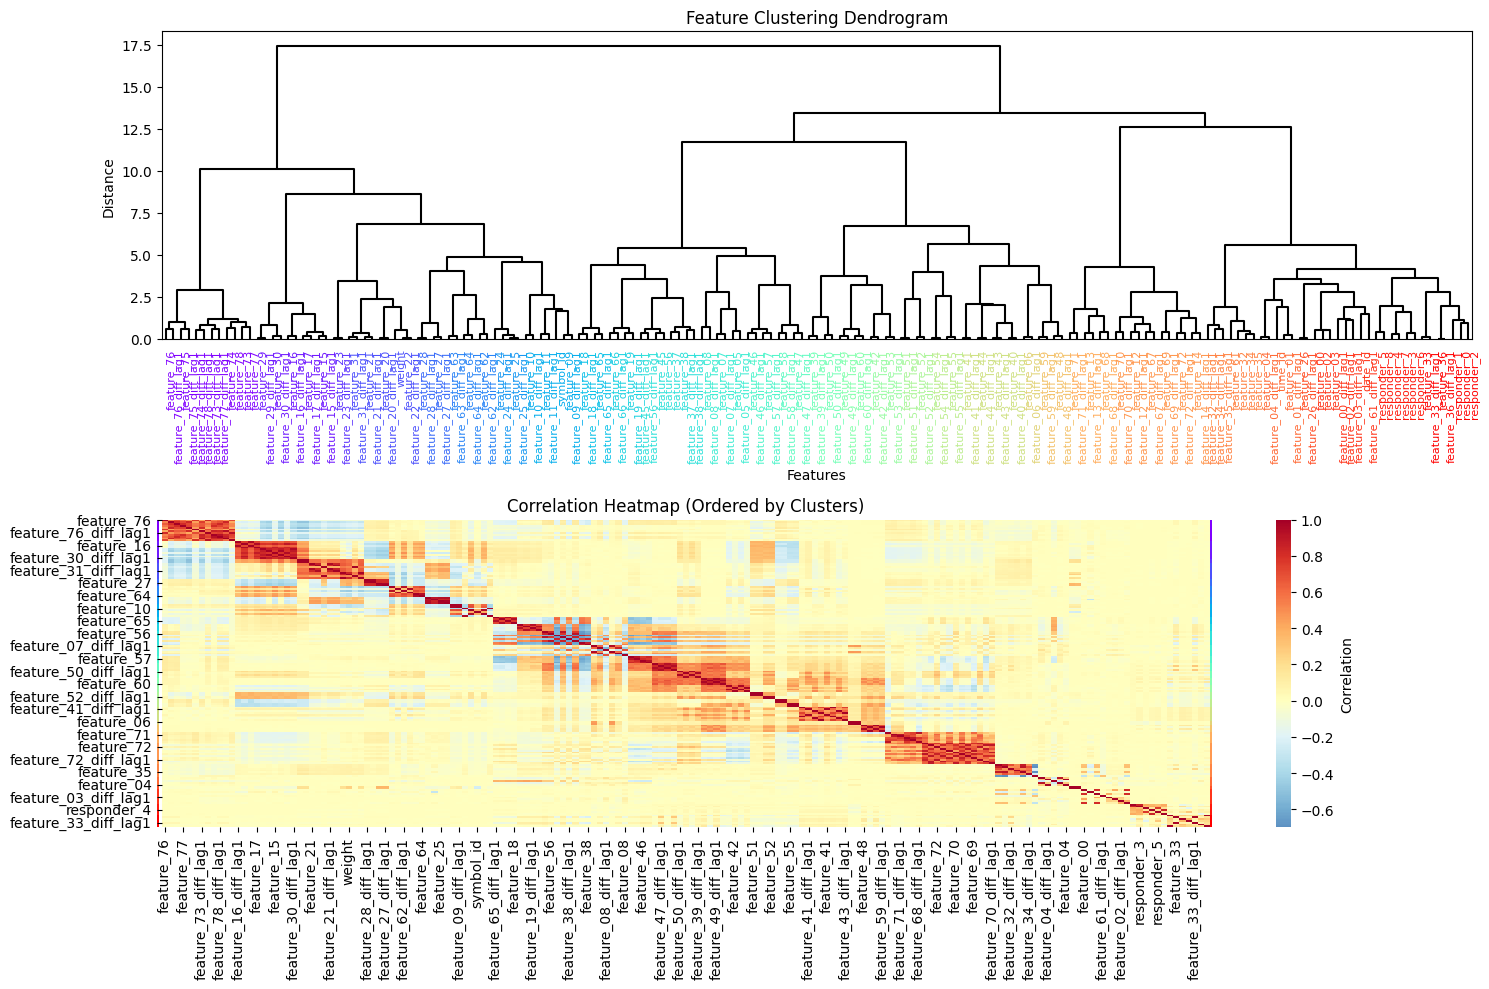

In [14]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

def cluster_from_correlation(corr_mat, n_clusters=5, figsize=(15, 10)):
    """
    상관계수 행렬을 기반으로 특성들을 클러스터링하고 클러스터별로 색상을 구분하여 시각화합니다.
    """
    
    # 상관계수 행렬을 거리 행렬로 변환 (1 - |상관계수|)
    distance_matrix = 1 - np.abs(corr_mat)
    
    # 계층적 클러스터링 수행
    linkage_matrix = linkage(distance_matrix.values, method='ward')
    
    # 클러스터 레이블 생성
    cluster_labels = fcluster(linkage_matrix, n_clusters, criterion='maxclust')
    
    # 결과를 데이터프레임으로 정리
    cluster_df = pd.DataFrame({
        'feature': corr_mat.index,
        'cluster': cluster_labels
    })
    
    # 클러스터별 색상 지정
    colors = plt.cm.rainbow(np.linspace(0, 1, n_clusters))
    cluster_colors = dict(zip(range(1, n_clusters + 1), colors))
    
    # 각 feature에 대한 색상 매핑
    feature_colors = {row['feature']: cluster_colors[row['cluster']] 
                     for _, row in cluster_df.iterrows()}
    
    # 시각화
    fig = plt.figure(figsize=figsize)
    
    # 덴드로그램
    plt.subplot(2, 1, 1)
    
    def leaf_color_func(k):
        return mcolors.rgb2hex(feature_colors[corr_mat.index[k]])
    
    dendrogram(linkage_matrix, 
              labels=corr_mat.index, 
              leaf_rotation=90,
              link_color_func=lambda k: 'black',
              leaf_label_func=lambda v: '\n' + corr_mat.index[v],
              leaf_font_size=8)
    
    # 덴드로그램의 리프 노드 색상 변경
    ax = plt.gca()
    for i, leaf in enumerate(ax.get_xticklabels()):
        leaf.set_color(feature_colors[leaf.get_text().strip()])
    
    plt.title('Feature Clustering Dendrogram')
    plt.xlabel('Features')
    plt.ylabel('Distance')
    
    # 히트맵
    plt.subplot(2, 1, 2)
    
    # 클러스터 순서대로 정렬
    ordered_features = cluster_df.sort_values('cluster')['feature']
    
    # row와 column 색상바 생성
    row_colors = [feature_colors[feat] for feat in ordered_features]
    
    # 히트맵 그리기
    sns.heatmap(corr_mat.loc[ordered_features, ordered_features], 
                cmap='RdYlBu_r', 
                center=0,
                cbar_kws={'label': 'Correlation'})
    
    # row와 column에 색상바 추가
    ax = plt.gca()
    ax.add_patch(plt.Rectangle((-0.7, 0), 0.3, len(corr_mat), 
                              facecolor='white', clip_on=False))
    ax.add_patch(plt.Rectangle((len(corr_mat), 0), 0.3, len(corr_mat), 
                              facecolor='white', clip_on=False))
    
    for idx, color in enumerate(row_colors):
        ax.add_patch(plt.Rectangle((-0.7, idx), 0.3, 1, 
                                 facecolor=color, clip_on=False))
        ax.add_patch(plt.Rectangle((len(corr_mat), idx), 0.3, 1, 
                                 facecolor=color, clip_on=False))
    
    plt.title('Correlation Heatmap (Ordered by Clusters)')
    plt.tight_layout()
    
    # 클러스터별 특성 출력
    print("\nClustering Results:")
    for i in range(1, n_clusters + 1):
        features = cluster_df[cluster_df['cluster'] == i]['feature'].tolist()
        
        # 클러스터 내 평균 상관계수 계산
        cluster_corr = corr_mat.loc[features, features]
        mean_corr = cluster_corr.values[np.triu_indices_from(cluster_corr.values, k=1)].mean()
        if abs(mean_corr) > 0.3:    
            print(f"\nCluster {i} ({len(features)} features):")
            print(f"Features: {', '.join(features)}")
            print(f"Average internal correlation: {mean_corr:.3f}")
    
    return cluster_df

# 사용 예시:
"""
# 클러스터링 수행
n_clusters = 20
cluster_results = cluster_from_correlation(corr_matrix, n_clusters=n_clusters)
"""
# 클러스터링 수행
n_clusters = 30  # 원하는 클러스터 수
cluster_results = cluster_from_correlation(corr_matrix, n_clusters=n_clusters)

# 특정 클러스터의 특성 확인
cluster_1_features = cluster_results[cluster_results['cluster'] == 1]['feature']
print("\nCluster 1 features:", cluster_1_features.tolist())


In [9]:
def get_high_correlation_pairs(corr_mat, threshold=0.3):
    # 대각선의 상삼각 행렬만 선택 (중복 제거)
    upper_tri = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(bool))
    
    # threshold 이상인 값들을 찾아서 데이터프레임으로 변환
    high_corr = upper_tri.unstack()
    high_corr = high_corr[abs(high_corr) >= threshold]
    
    # Series를 데이터프레임으로 변환하고 컬럼명 지정
    high_corr_df = pd.DataFrame(high_corr).reset_index()
    high_corr_df.columns = ['Feature 1', 'Feature 2', 'Correlation']
    
    # 상관계수 절대값 기준으로 정렬
    high_corr_df = high_corr_df.sort_values('Correlation', key=abs, ascending=False)
    
    return high_corr_df

high_corr_mat = get_high_correlation_pairs(corr_matrix)

In [10]:
high_corr_mat['Feature 1'].str.contains('responder').sum()

np.int64(13)

In [11]:
high_corr_mat

Feature 1   Feature 2  Correlation
682   feature_36_diff_lag1  feature_36     0.994537
731   feature_40_diff_lag1  feature_40     0.991221
766   feature_43_diff_lag1  feature_43     0.991159
536   feature_23_diff_lag1  feature_23     0.987661
914   feature_51_diff_lag1  feature_51     0.987310
...                    ...         ...          ...
1024  feature_57_diff_lag1  feature_49     0.300777
1300  feature_74_diff_lag1  feature_31    -0.300725
225             feature_60  feature_45     0.300689
321             feature_74  feature_22    -0.300481
392   feature_09_diff_lag1  feature_25    -0.300386

[1357 rows x 3 columns]

In [12]:
df.head()

date_id  time_id  symbol_id    weight  feature_00  feature_01  \
0          510        0          1  3.781848    1.133465    1.169322   
15853      510      566          8  2.052294    1.037008    1.173473   
15852      510      566          7  2.119630    1.185870    0.115313   
15851      510      566          5  2.492037    1.239681    0.606848   
15850      510      566          3  0.839891    1.246653    0.553994   

       feature_02  feature_03  feature_04  feature_05  ...  \
0        1.248159    1.088562   -0.380088    0.277877  ...   
15853    1.504894    1.235540   -0.677818    0.372821  ...   
15852    1.140514    1.342115   -0.944520    0.210187  ...   
15851    1.197858    1.176322   -1.535926    0.210615  ...   
15850    1.259052    1.166400   -0.322466    0.248240  ...   

       feature_69_diff_lag1  feature_70_diff_lag1  feature_71_diff_lag1  \
0                       NaN                   NaN                   NaN   
15853                   NaN                   NaN                   NaN   
15852                   NaN                   NaN                   NaN   
15851                   NaN                   NaN                   NaN   
15850                   NaN                   NaN                   NaN   

       feature_72_diff_lag1  feature_73_diff_lag1  feature_74_diff_lag1  \
0                       NaN                   NaN                   NaN   
15853                   NaN                   NaN                   NaN   
15852                   NaN                   NaN                   NaN   
15851                   NaN                   NaN                   NaN   
15850                   NaN                   NaN                   NaN   

       feature_75_diff_lag1  feature_76_diff_lag1  feature_77_diff_lag1  \
0                       NaN                   NaN                   NaN   
15853                   NaN                   NaN                   NaN   
15852                   NaN                   NaN                   NaN   
15851                   NaN                   NaN                   NaN   
15850                   NaN                   NaN                   NaN   

       feature_78_diff_lag1  
0                       NaN  
15853                   NaN  
15852                   NaN  
15851                   NaN  
15850                   NaN  

[5 rows x 171 columns]

In [85]:
result_df.loc[(result_df['date_id']==510)]['symbol_id'].unique()

array([ 1,  2,  3,  5,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20,
       21, 22, 23, 25, 26, 29, 30, 33, 34, 36, 38], dtype=int8)

In [107]:
feature_columns = df.columns.str.contains('feature')
responder_columns = df.columns.str.contains('responder')

result_df['responder_6'] = result_df['responder_6'].astype(int)

In [115]:
result_df.loc[(result_df['date_id']==510) & (result_df['symbol_id']==1), ['time_id','responder_6']]

time_id  responder_6
0            0            9
28           1            9
56           2            9
84           3            9
112          4            9
...        ...          ...
23632      844            9
23660      845            9
23688      846            8
23716      847            6
23744      848            5

[849 rows x 2 columns]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 빈 데이터프레임 생성
responder_df = pd.DataFrame()

# 특정 date_id의 모든 unique symbol에 대해 반복
symbols = result_df.loc[result_df['date_id']==510, 'symbol_id'].unique()

for symbol in symbols:
    # 현재 심볼의 데이터 추출
    temp_df = result_df.loc[
        (result_df['date_id']==510) & 
        (result_df['symbol_id']==symbol), 
        ['time_id','responder_6']
    ].set_index('time_id')
    
    # 컬럼명을 심볼 ID로 변경
    temp_df.columns = [f'symbol_{symbol}']
    
    # 결과 데이터프레임에 병합
    responder_df = pd.concat([responder_df, temp_df], axis=1)

symbol_1  symbol_2  symbol_3  symbol_5  symbol_7  symbol_8  symbol_9  \
time_id                                                                         
0               9         1         9         3         2         2         7   
1               9         1         9         4         2         3         8   
2               9         1         9         2         3         5         8   
3               9         1         9         2         3         4         7   
4               9         1         8         3         3         5         8   
...           ...       ...       ...       ...       ...       ...       ...   
844             9         1         2         2         3         8         7   
845             9         1         6         3         6         8         8   
846             8         2         8         6         7         9         8   
847             6         3         8         4         5         7         7   
848             5         1         6         4         5         7         8   

         symbol_10  symbol_11  symbol_12  ...  symbol_22  symbol_23  \
time_id                                   ...                         
0                3          9          1  ...          1          5   
1                4          9          2  ...          1          2   
2                2          9          2  ...          1          8   
3                3          9          2  ...          1          6   
4                3          9          2  ...          1          6   
...            ...        ...        ...  ...        ...        ...   
844              2          5          9  ...          4          2   
845              6          4          9  ...          5          4   
846              6          7          9  ...          7          8   
847              4          6          9  ...          3          1   
848              8          6          8  ...          5          4   

         symbol_25  symbol_26  symbol_29  symbol_30  symbol_33  symbol_34  \
time_id                                                                     
0                9          6          9          4          9          6   
1                9          7          9          7          9          7   
2                8          6          9          7          9          7   
3                6          7          9          5          9          7   
4                7          5          9          4          9          5   
...            ...        ...        ...        ...        ...        ...   
844              8          7          7          4          9          8   
845              8          8          7          5          9          9   
846              9          9          7          7          9          7   
847              8          8          7          5          9          4   
848              3          7          7          4          9          4   

         symbol_36  symbol_38  
time_id                        
0                3          1  
1                1          1  
2                2          1  
3                2          2  
4                2          6  
...            ...        ...  
844              3          1  
845              5          2  
846              6          4  
847              5          3  
848              5          3  

[849 rows x 28 columns]

/tmp/ipykernel_1240266/48581717.py:25: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distance_matrix, method='ward')


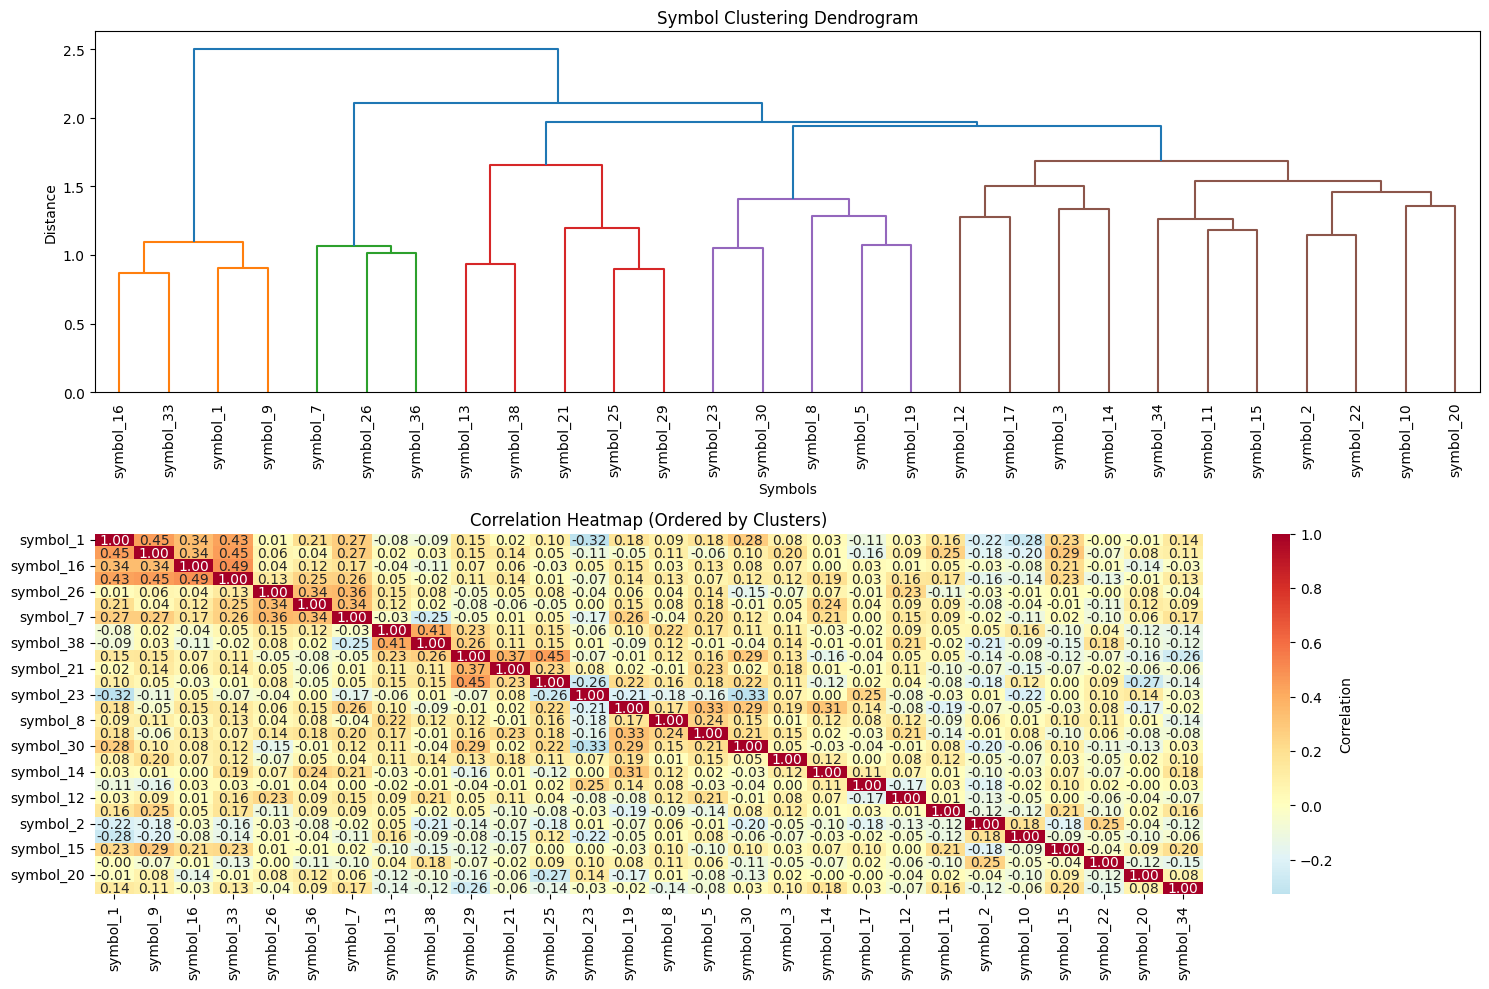


Clustering Results:

Cluster 1:
Symbols: symbol_1, symbol_9, symbol_16, symbol_33

Cluster 2:
Symbols: symbol_7, symbol_26, symbol_36

Cluster 3:
Symbols: symbol_13, symbol_38

Cluster 4:
Symbols: symbol_21, symbol_25, symbol_29

Cluster 5:
Symbols: symbol_5, symbol_8, symbol_19, symbol_23, symbol_30

Cluster 6:
Symbols: symbol_3, symbol_12, symbol_14, symbol_17

Cluster 7:
Symbols: symbol_2, symbol_10, symbol_11, symbol_15, symbol_20, symbol_22, symbol_34


In [ ]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

def cluster_symbols(df, n_clusters=5):
    # 데이터 전처리
    # StandardScaler로 각 시계열을 정규화
    scaler = StandardScaler()
    scaled_df = pd.DataFrame(
        scaler.fit_transform(df),
        columns=df.columns,
        index=df.index
    )
    
    # 상관계수 행렬 계산
    corr_matrix = scaled_df.corr()
    
    # 상관계수를 거리로 변환 (1 - 상관계수)
    distance_matrix = 1 - np.abs(corr_matrix)
    
    # 계층적 클러스터링 수행
    linkage_matrix = linkage(distance_matrix, method='ward')
    
    # 클러스터 레이블 생성
    cluster_labels = fcluster(linkage_matrix, n_clusters, criterion='maxclust')
    
    # 결과를 데이터프레임으로 정리
    cluster_df = pd.DataFrame({
        'symbol': corr_matrix.index,
        'cluster': cluster_labels
    })
    
    # 시각화
    plt.figure(figsize=(15, 10))
    
    # 덴드로그램
    plt.subplot(2, 1, 1)
    dendrogram(linkage_matrix, labels=corr_matrix.index, leaf_rotation=90)
    plt.title('Symbol Clustering Dendrogram')
    plt.xlabel('Symbols')
    plt.ylabel('Distance')
    
    # 히트맵
    plt.subplot(2, 1, 2)
    # 클러스터 순서대로 정렬
    ordered_idx = cluster_df.sort_values('cluster').index
    sns.heatmap(corr_matrix.iloc[ordered_idx, ordered_idx], 
                cmap='RdYlBu_r', 
                center=0,
                annot=True,
                fmt='.2f',
                cbar_kws={'label': 'Correlation'})
    
    plt.title('Correlation Heatmap (Ordered by Clusters)')
    plt.tight_layout()
    plt.show()
    
    
    return cluster_df

# 사용 예시:
# 클러스터링 수행
n_clusters = 7  # 원하는 클러스터 수 지정
cluster_results = cluster_symbols(responder_df, n_clusters=n_clusters)

# 결과 출력
print("\nClustering Results:")
for i in range(1, n_clusters + 1):
    symbols = cluster_results[cluster_results['cluster'] == i]['symbol'].tolist()
    print(f"\nCluster {i}:")
    print(f"Symbols: {', '.join(symbols)}")

In [125]:
cluster_results = cluster_symbols(df.loc[:, df.columns.str.contains('feature')], n_clusters=n_clusters)


KeyboardInterrupt: 

In [ ]:
responder_df

Empty DataFrame
Columns: []
Index: []

In [74]:
result_df.loc[(result_df['date_id']==510) & (result_df['symbol_id']==1), result_df.columns.str.contains('responder_6')].value_counts()

responder_6
3              133
2              130
6              124
5              117
4              110
7               79
1               67
8               47
9               42
Name: count, dtype: int64

In [75]:
result_df.loc[(result_df['date_id']==510), result_df.columns.str.contains('responder_6')].value_counts()

responder_6
6              2865
3              2790
4              2733
5              2732
2              2682
8              2544
9              2542
7              2455
1              2429
Name: count, dtype: int64

<Axes: xlabel='date_id'>

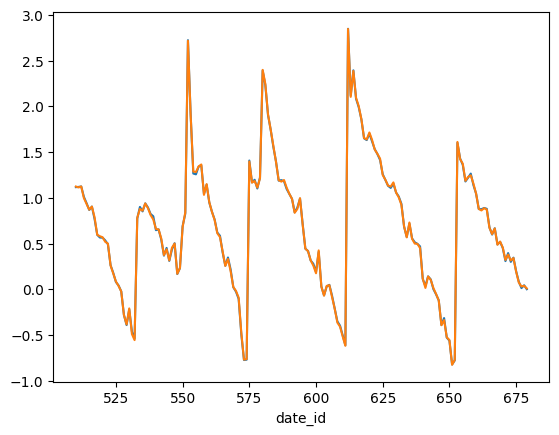

In [53]:
df.loc[df['symbol_id']==2].groupby(df['date_id']).mean()['feature_02'].plot()
df.groupby(df['date_id']).mean()['feature_02'].plot()

In [186]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_time_series(data, lags=[1,7,14,28], feature_name=""):
    """
    시계열 데이터의 자기상관성을 특정 lag에 대해서만 분석하는 함수
    
    Parameters:
    data: pandas Series or numpy array - 분석할 시계열 데이터
    lags: list or array-like - 분석하고자 하는 특정 lag 값들의 리스트 (예: [1,7,14,28])
    """
    
    # 데이터를 Series로 변환
    if not isinstance(data, pd.Series):
        data = pd.Series(data)
    
    data.dropna(inplace=True)
    
    # ACF 계산
    acf_values = acf(data, nlags=max(lags))
    selected_acf = [acf_values[lag] for lag in lags]
    
    # 시각화
    plt.figure(figsize=(10, 6))
    x_positions = range(len(lags))  # x축 위치를 0부터 순서대로 설정
    
    plt.bar(x_positions, selected_acf)
    plt.axhline(y=0, linestyle='--', color='gray')
    plt.axhline(y=1.96/np.sqrt(len(data)), linestyle='--', color='r', label='95% Confidence Interval')
    plt.axhline(y=-1.96/np.sqrt(len(data)), linestyle='--', color='r')
    plt.title(f'Autocorrelation Function (ACF) for Selected Lags: {feature_name}')
    plt.xlabel('Lag')
    plt.ylabel('Correlation')
    
    # x축 눈금 설정 - 선택된 lag 값들만 표시
    plt.xticks(x_positions, lags)
    plt.legend()
    
    plt.tight_layout()
    return pd.Series(selected_acf, index=lags)

/home/luke/anaconda3/envs/rl4trading/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:702: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]
/home/luke/anaconda3/envs/rl4trading/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:702: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]
/home/luke/anaconda3/envs/rl4trading/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:702: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]
/tmp/ipykernel_1240266/472179656.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


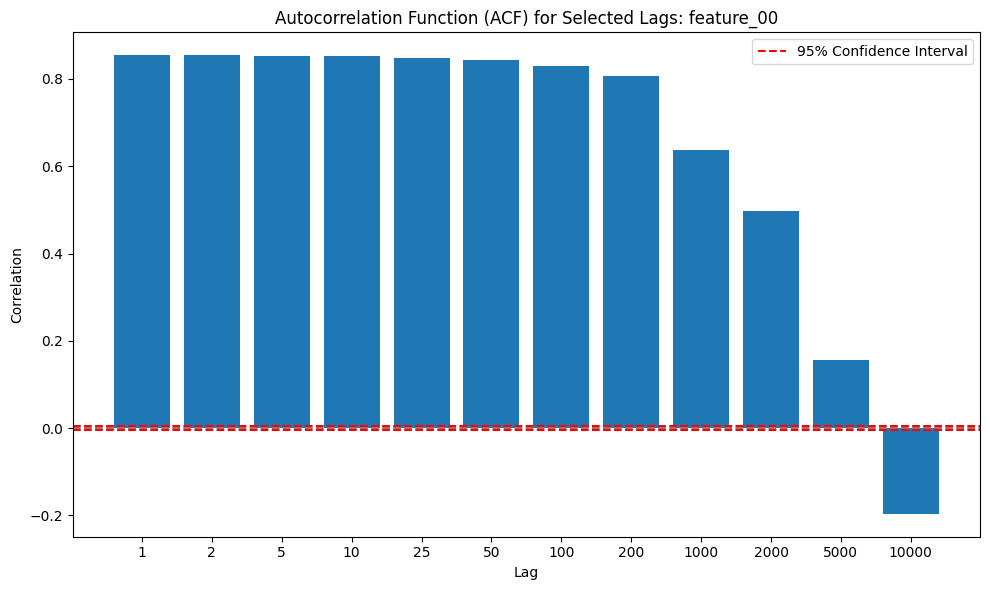

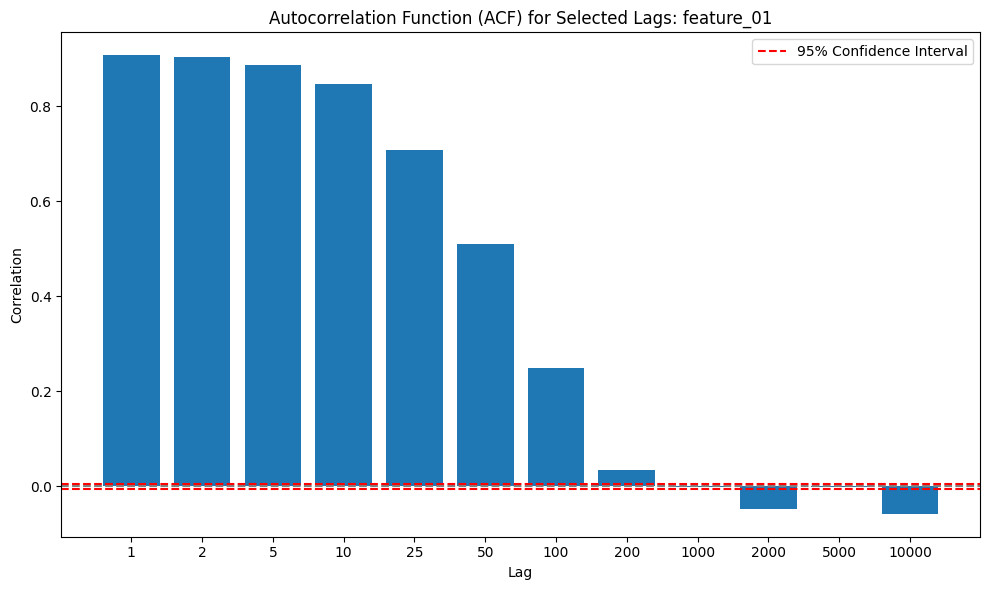

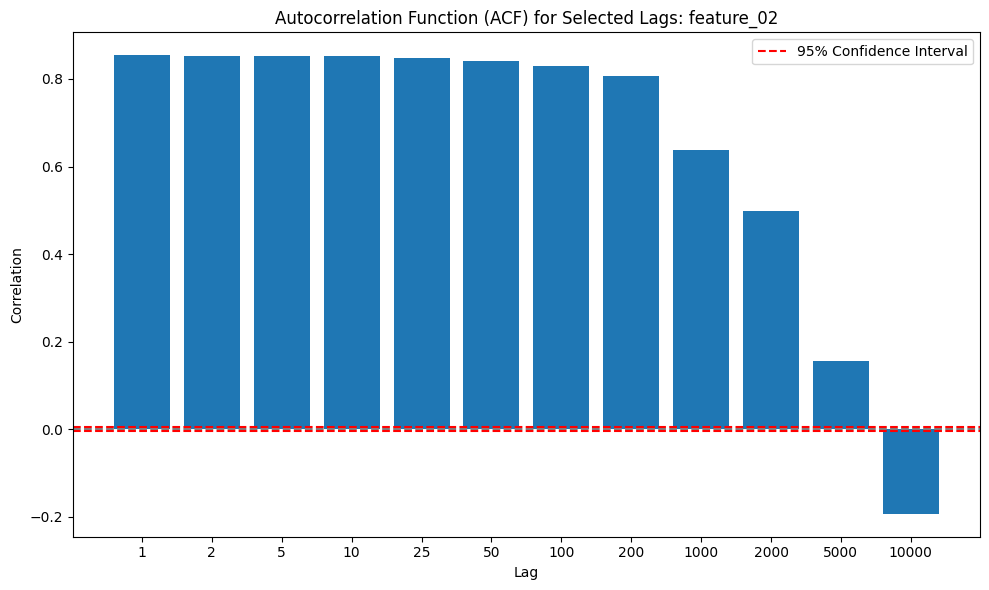

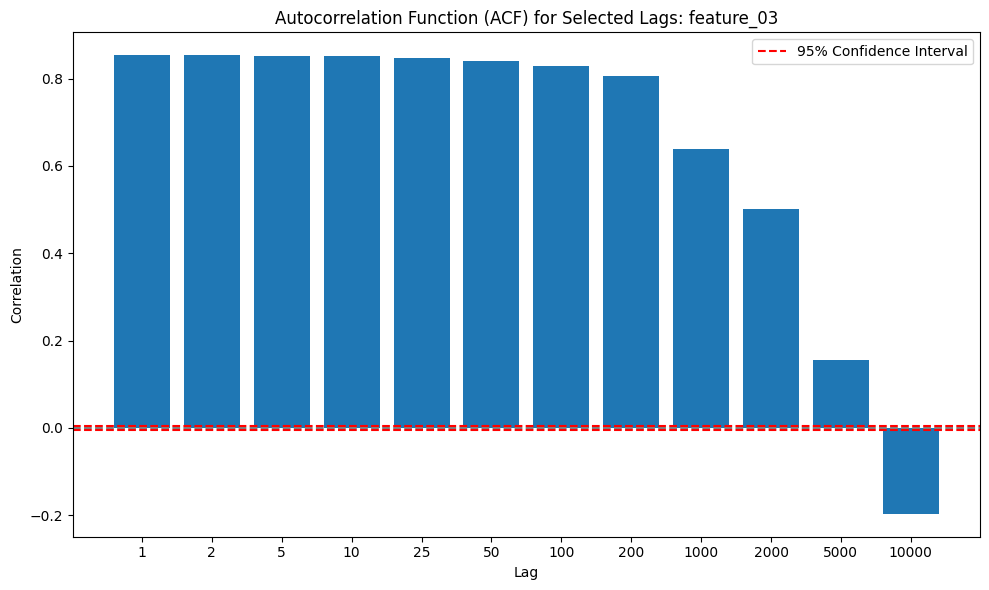

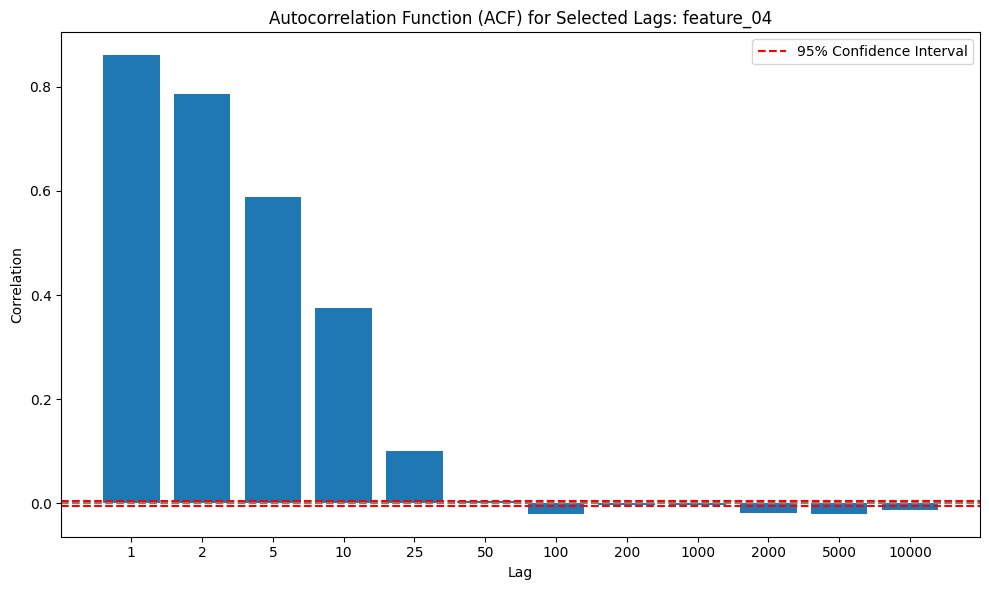

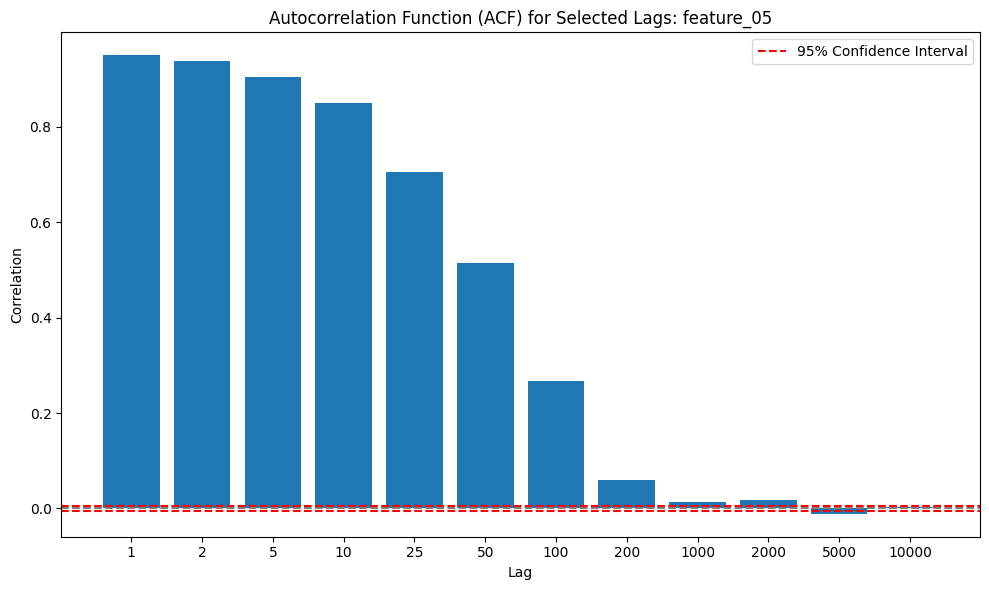

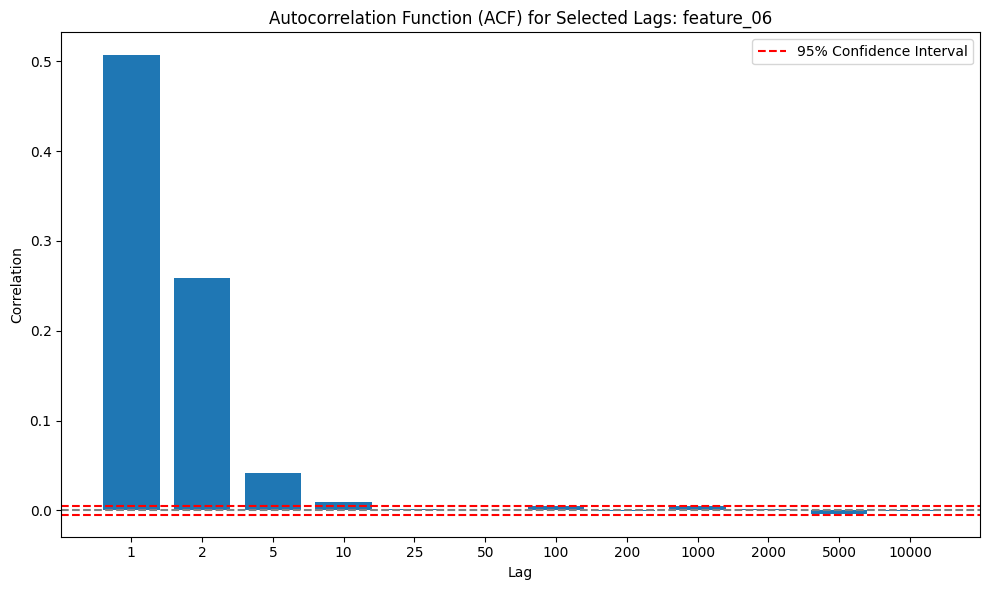

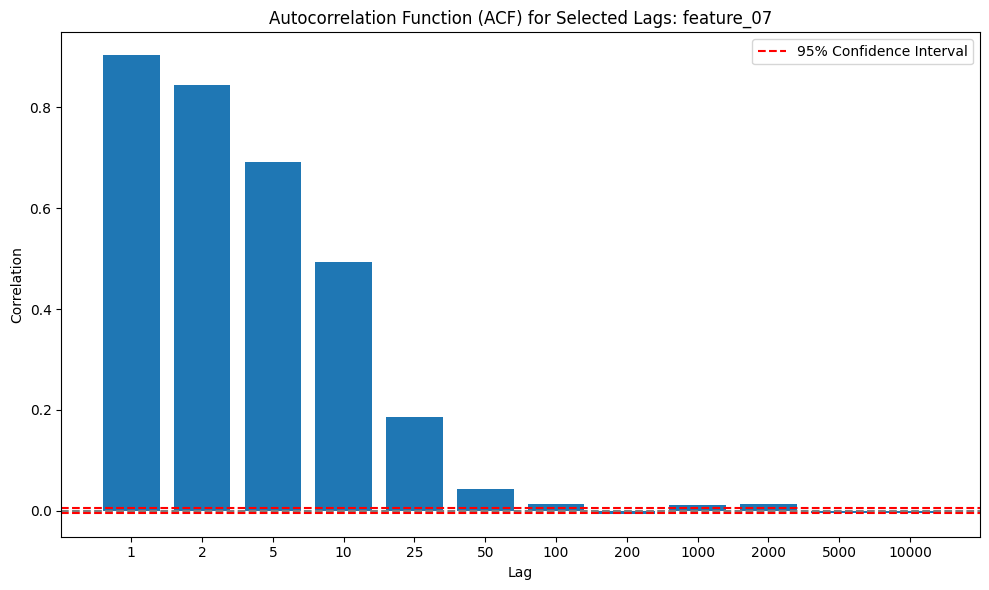

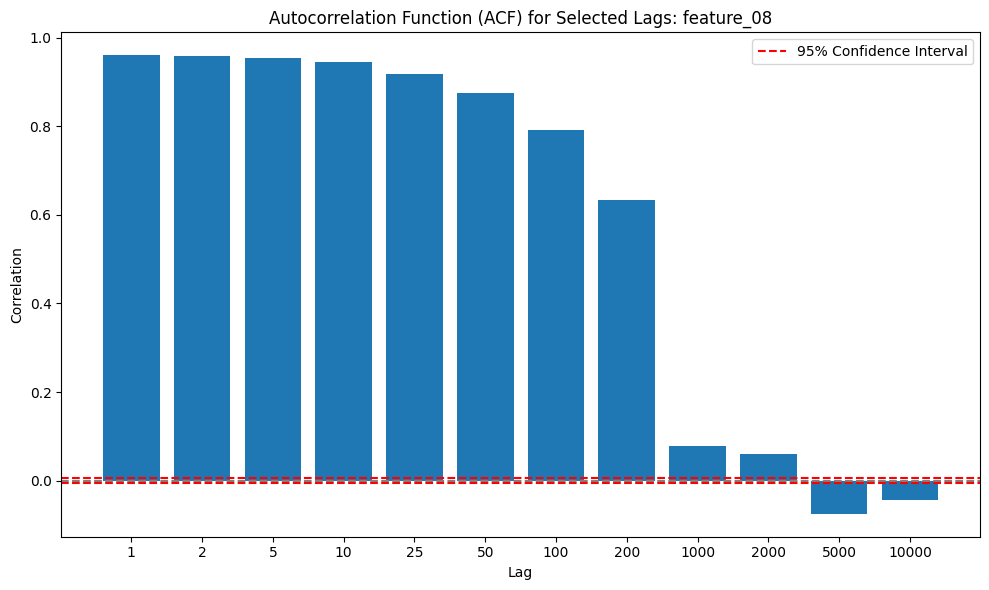

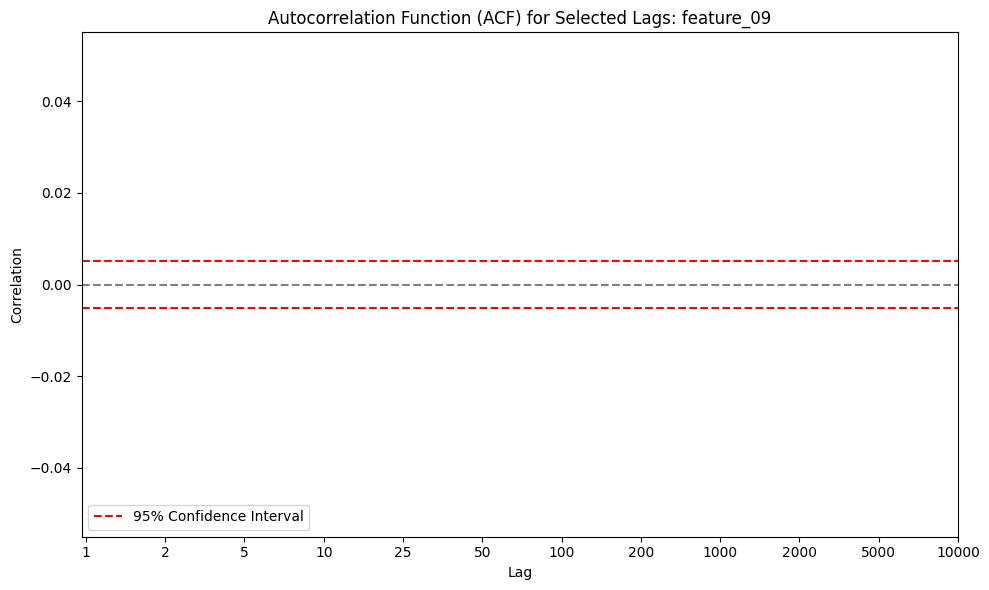

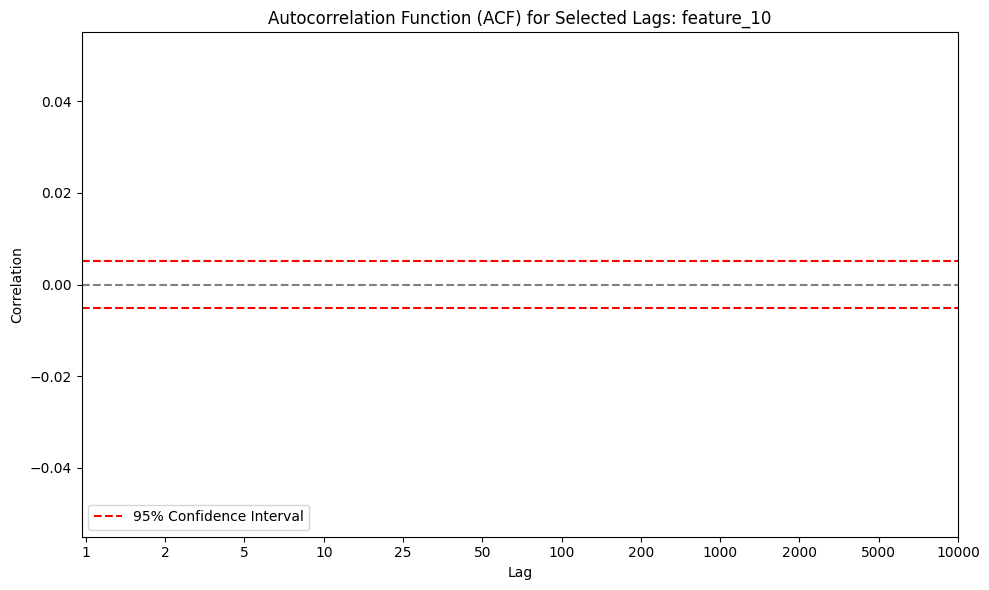

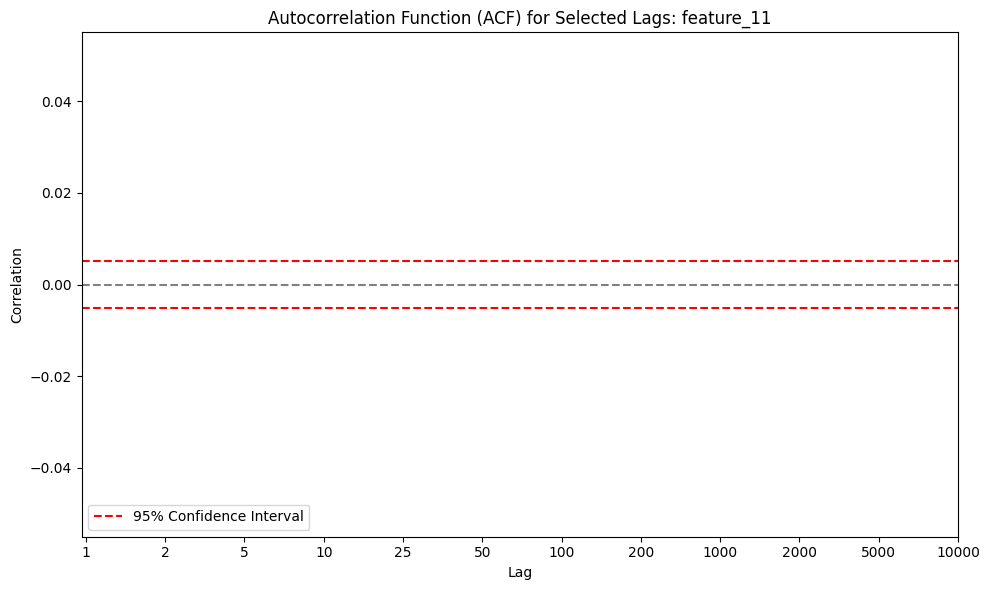

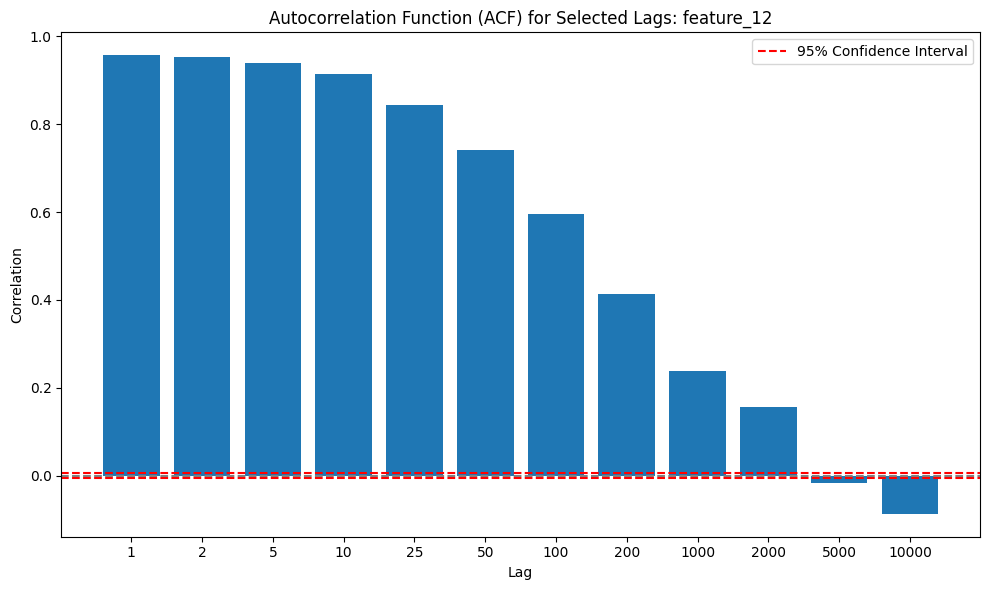

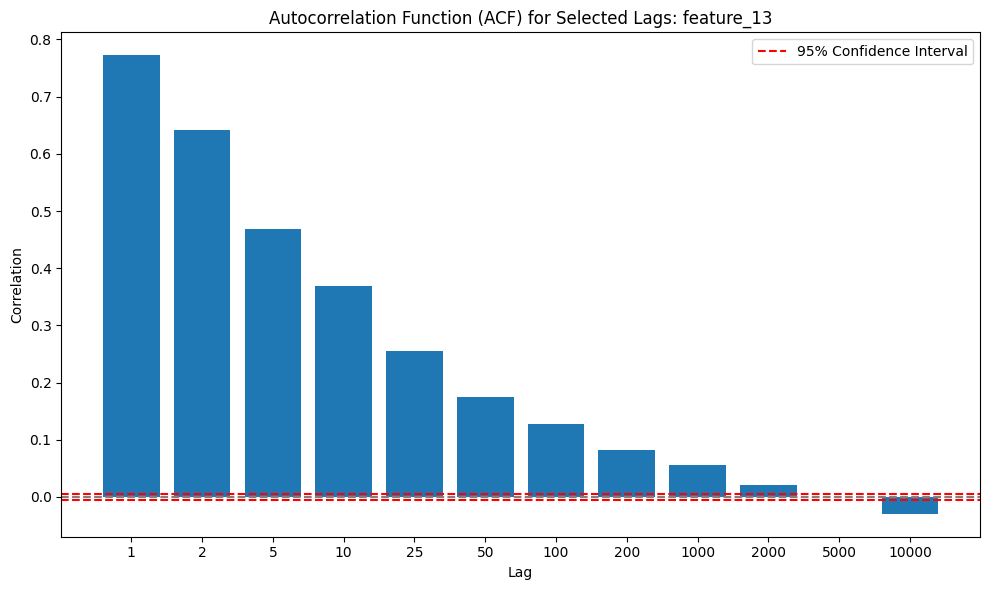

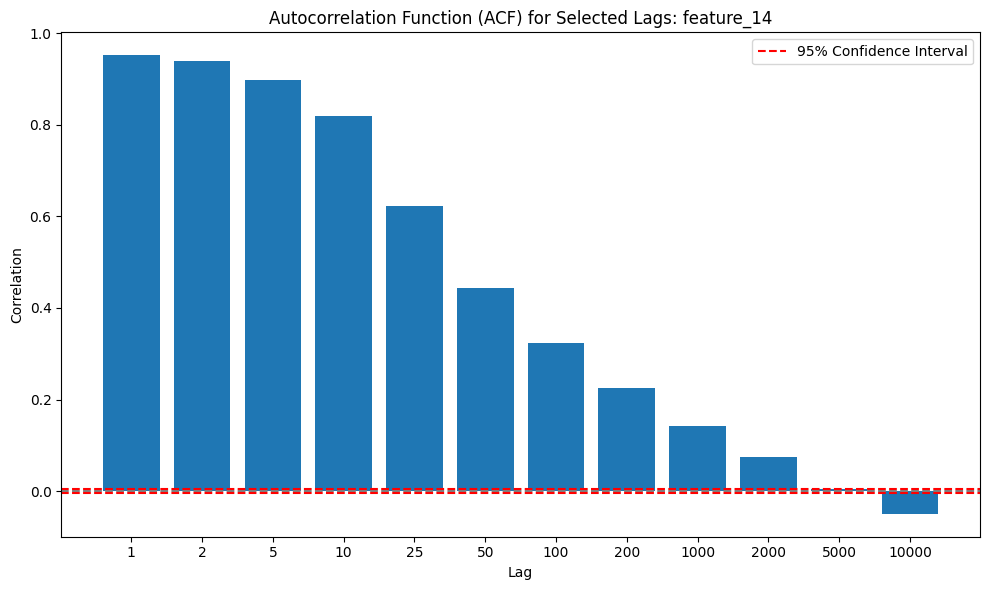

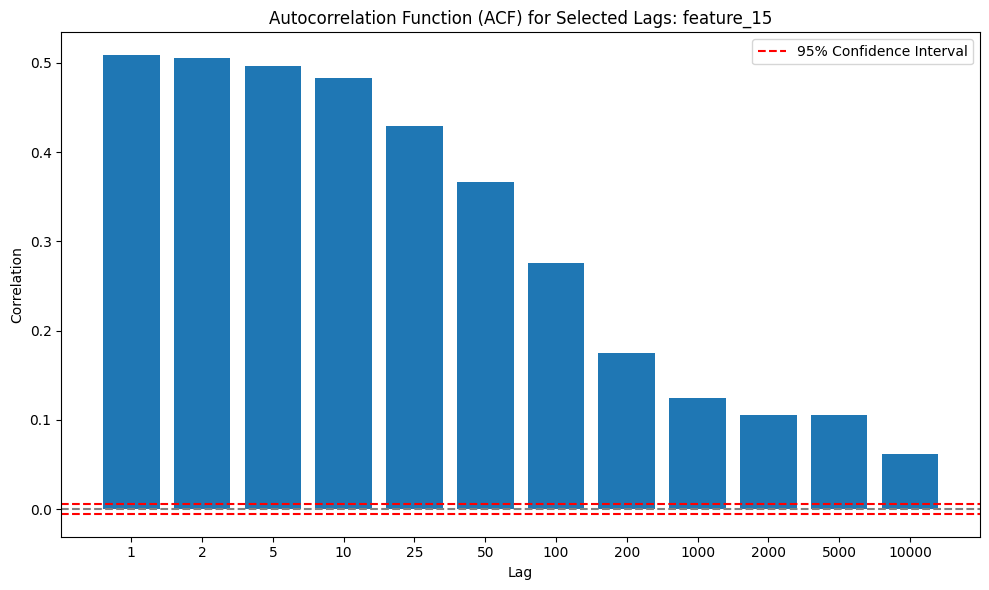

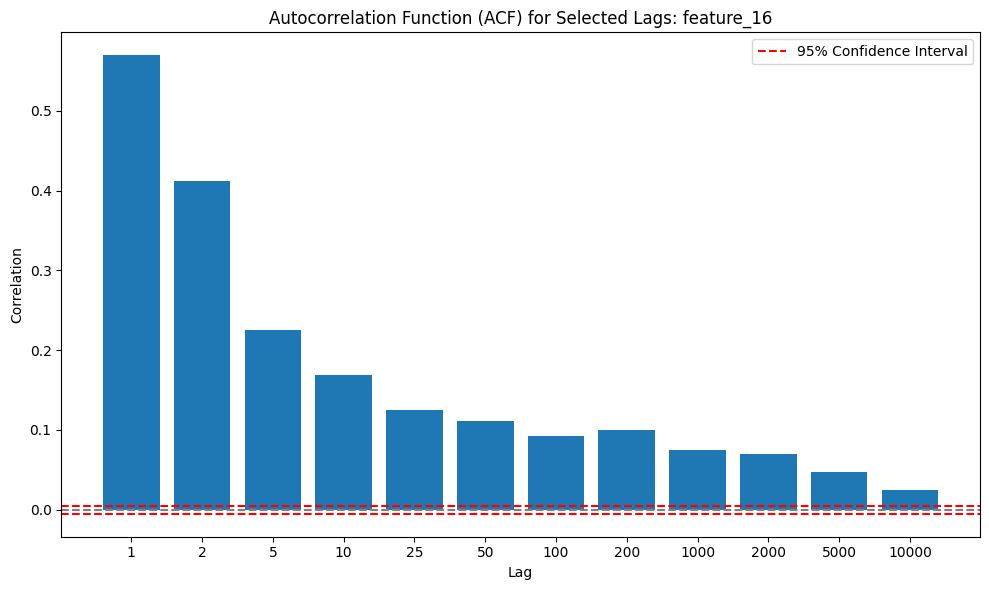

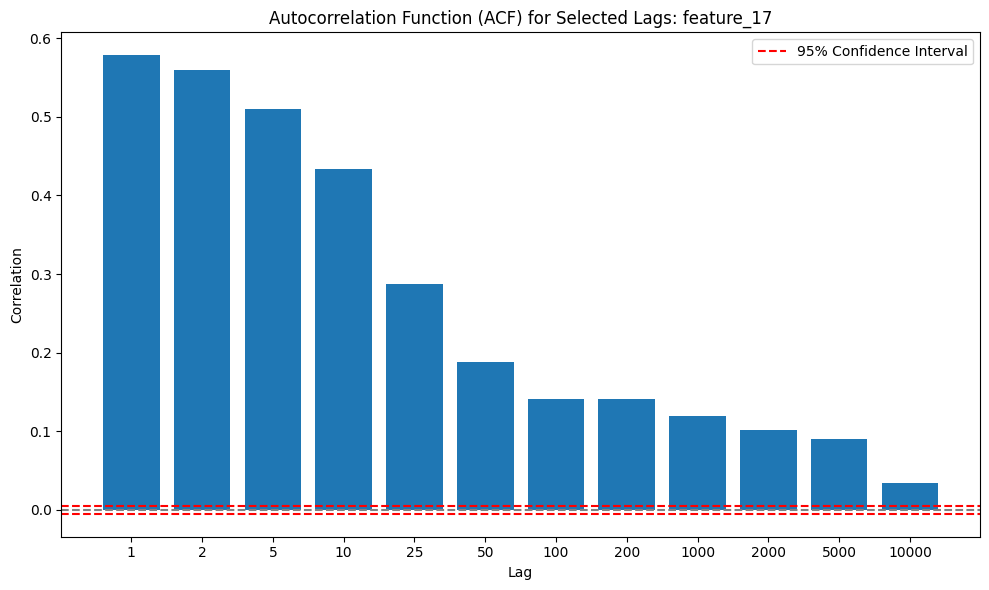

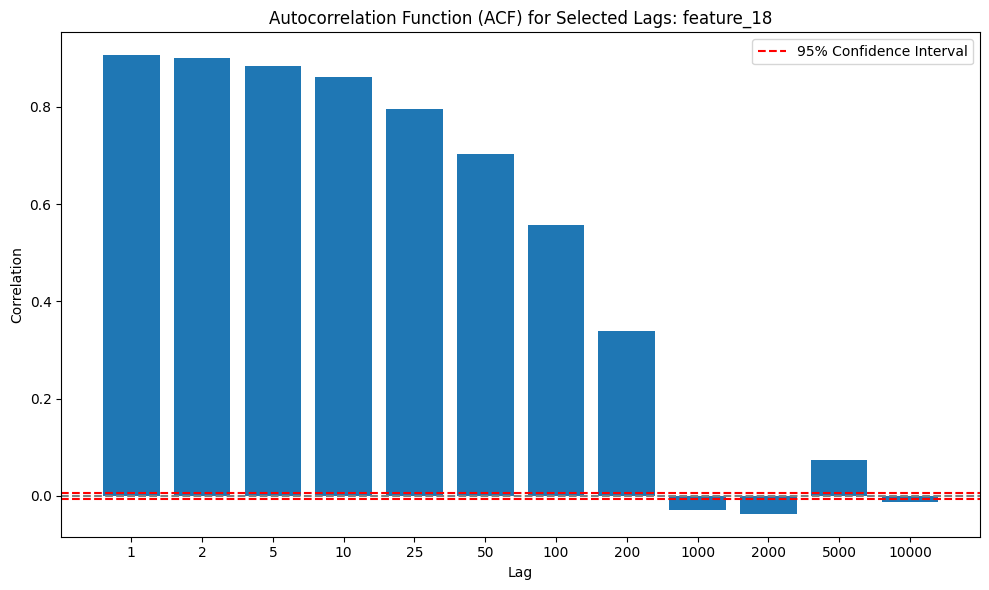

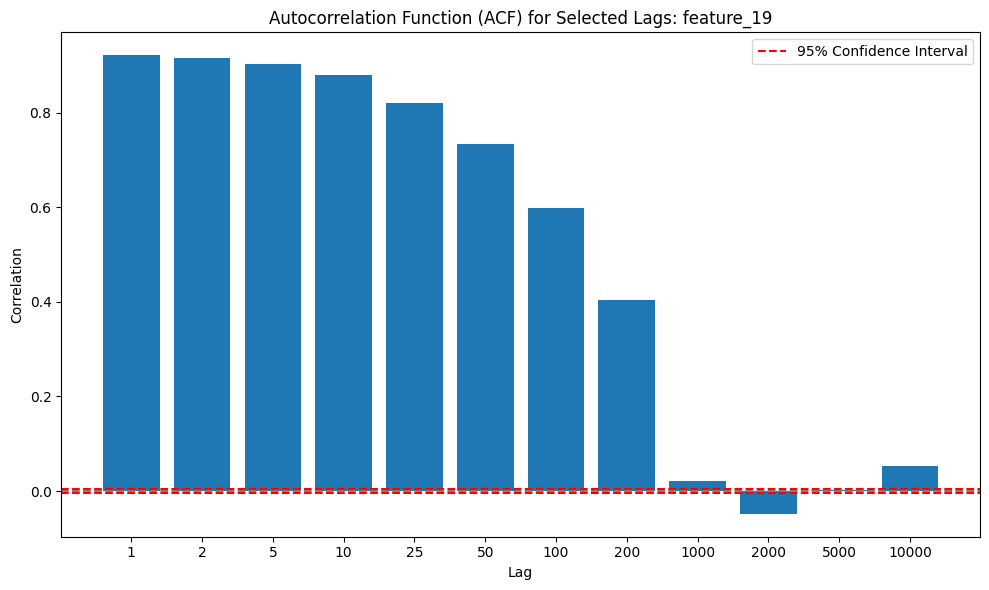

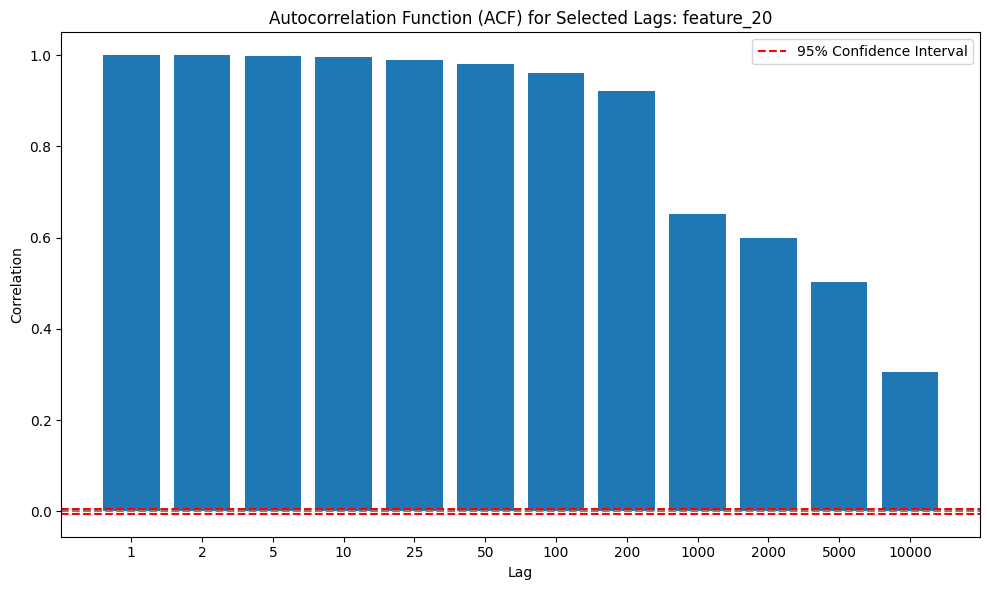

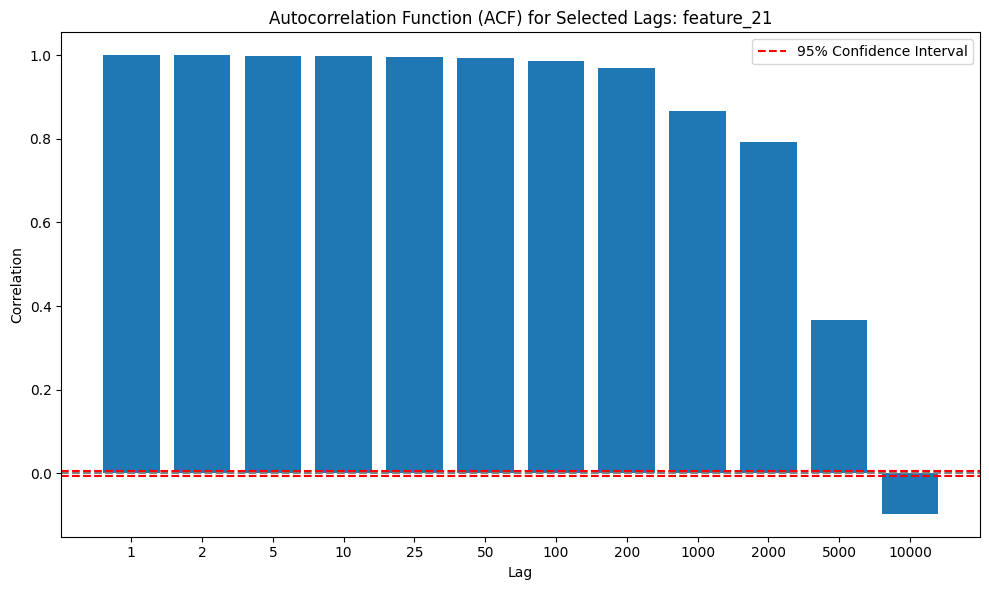

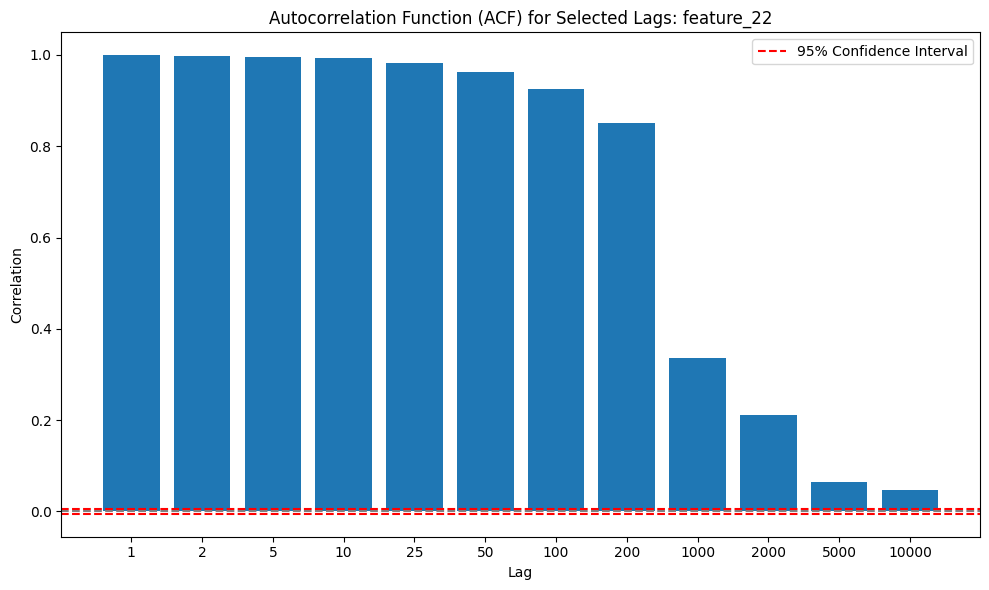

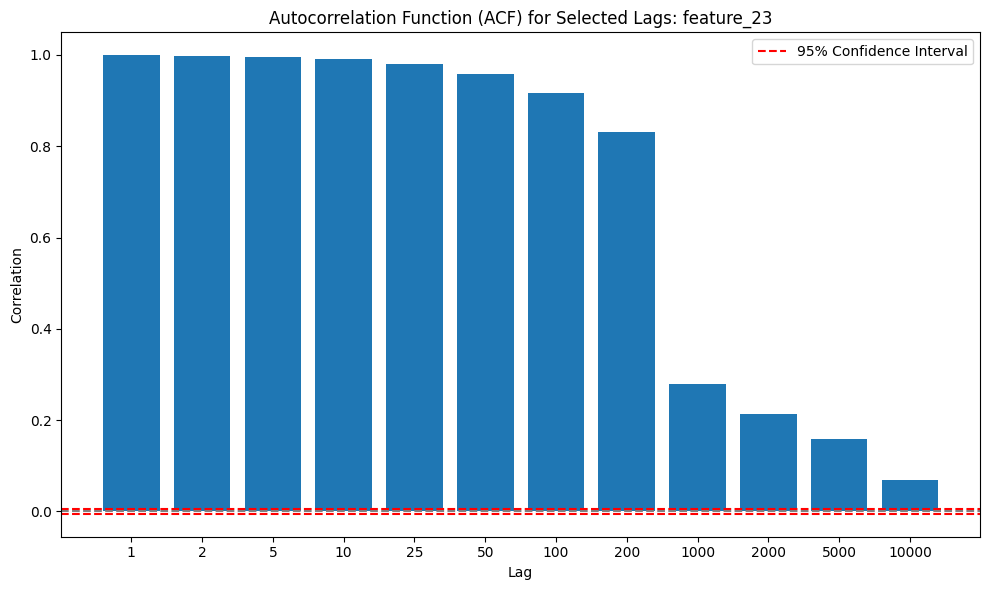

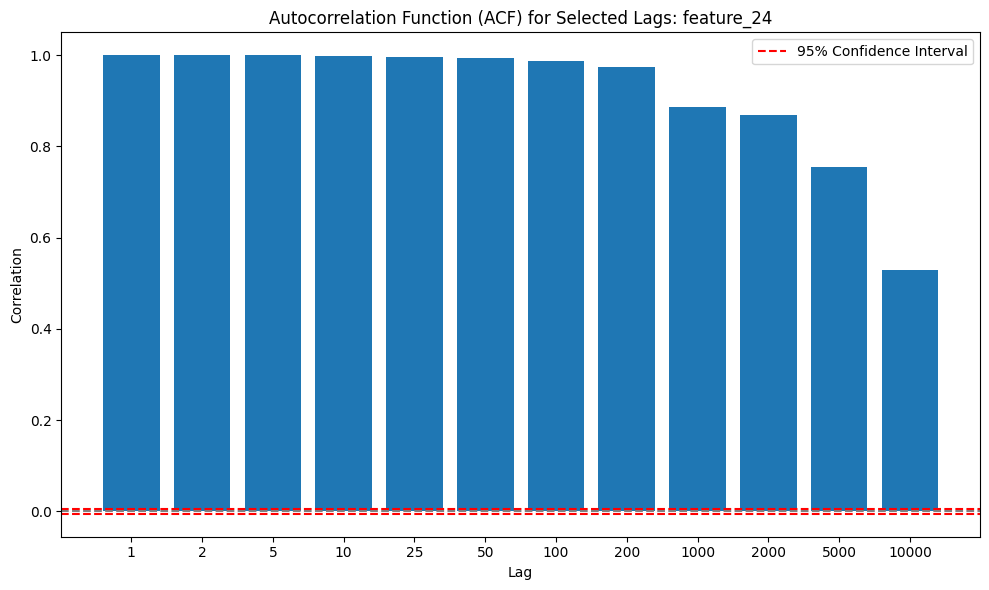

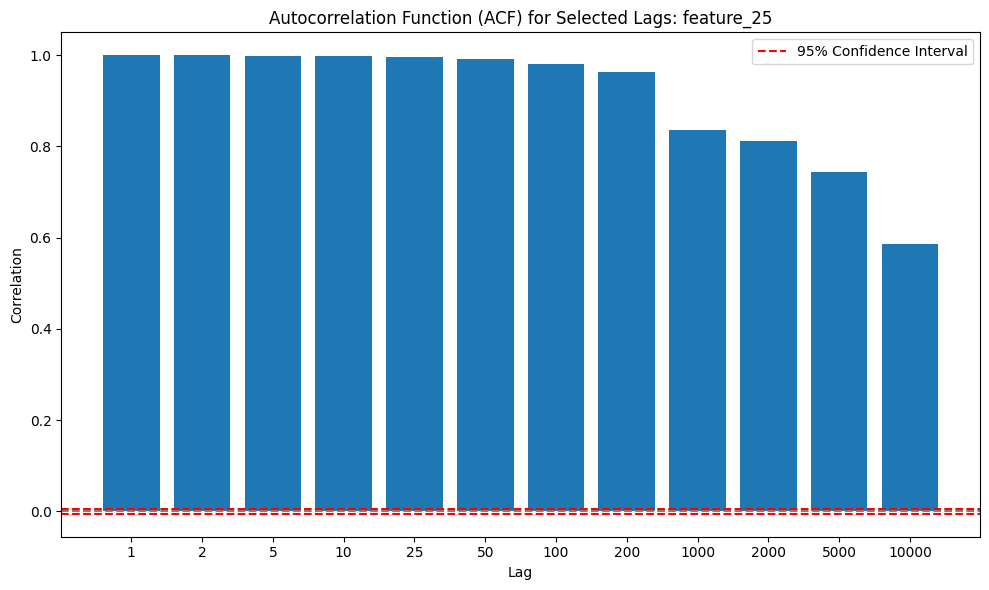

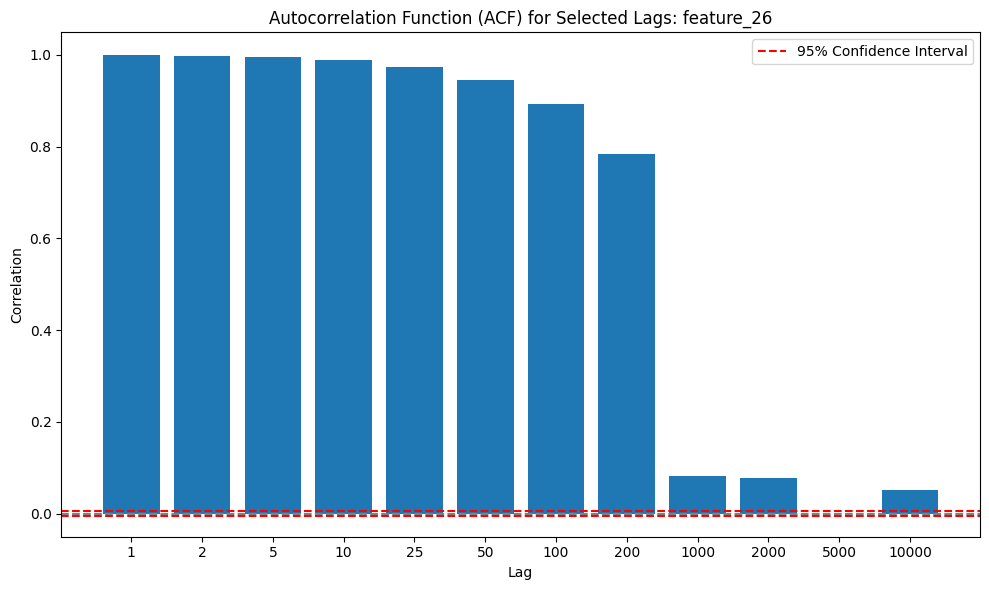

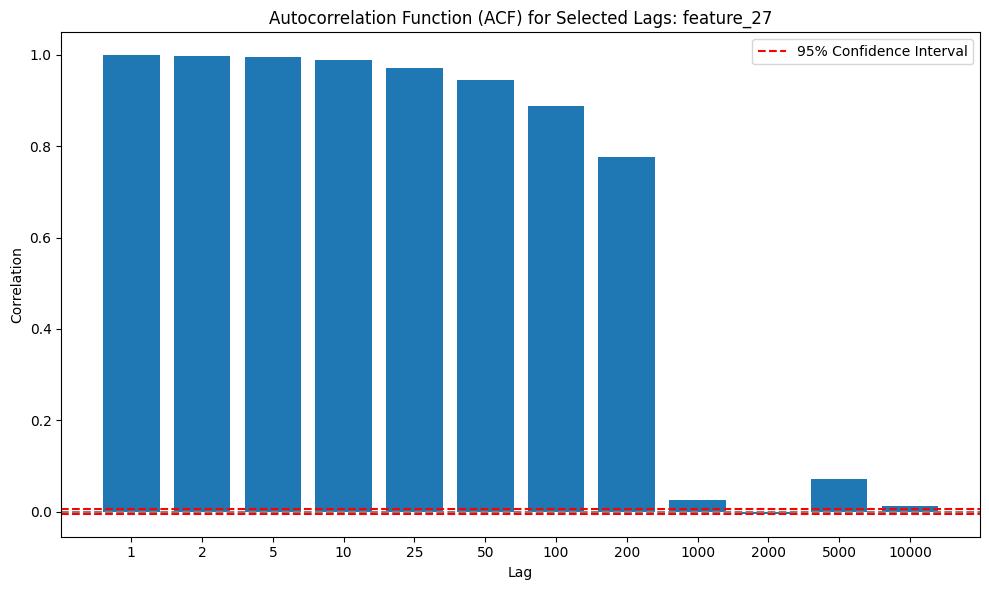

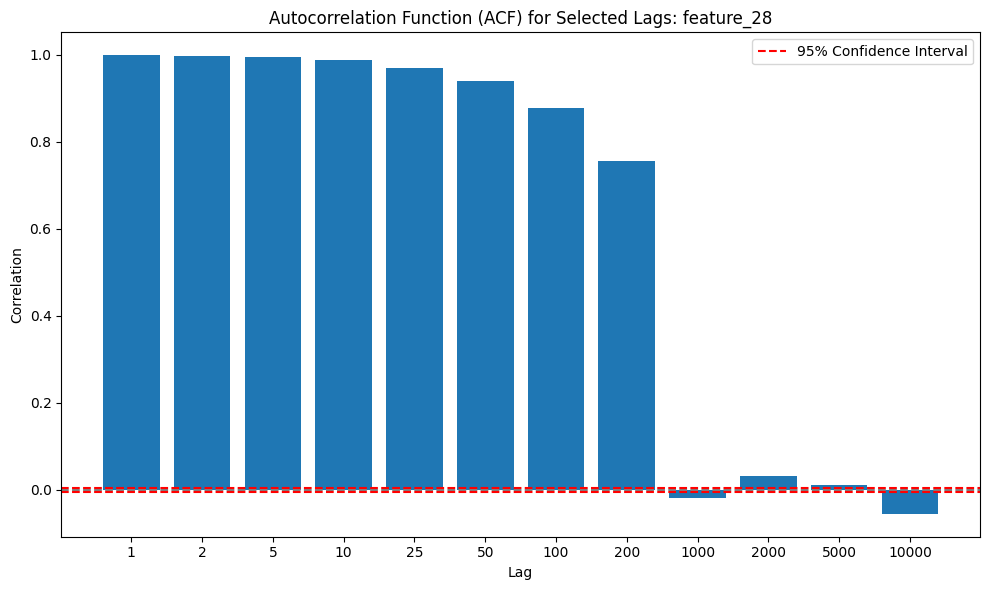

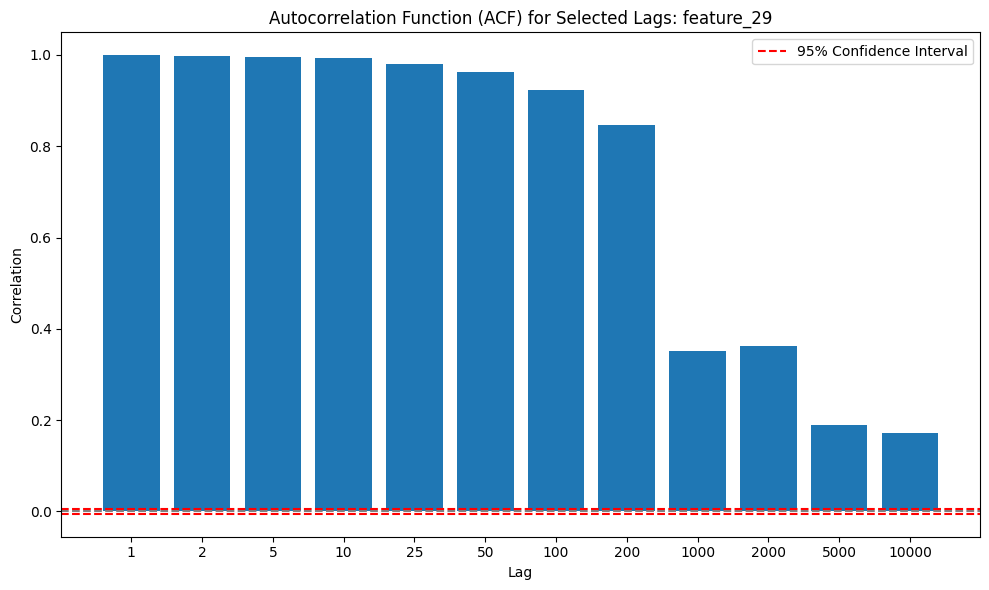

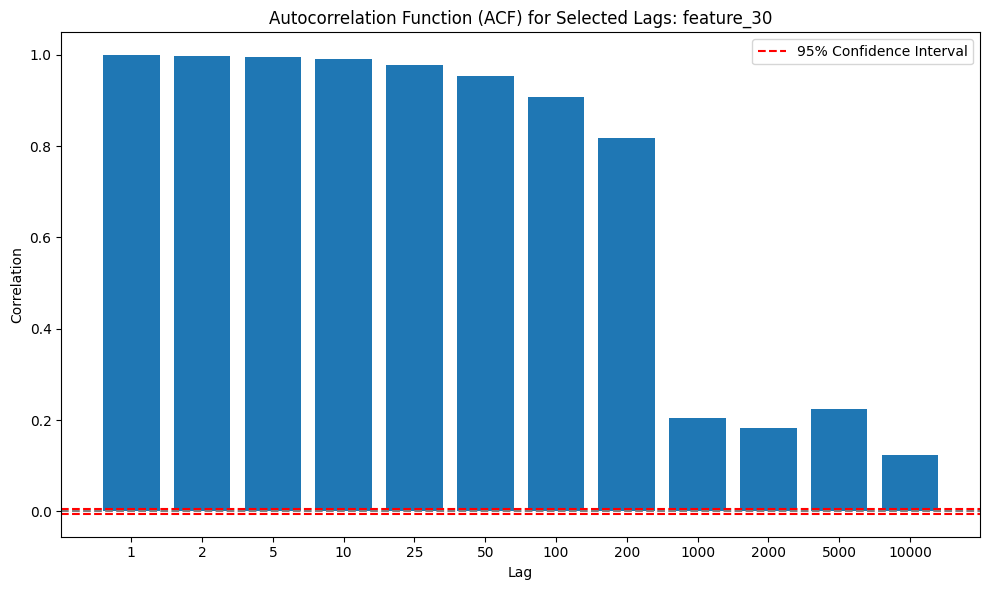

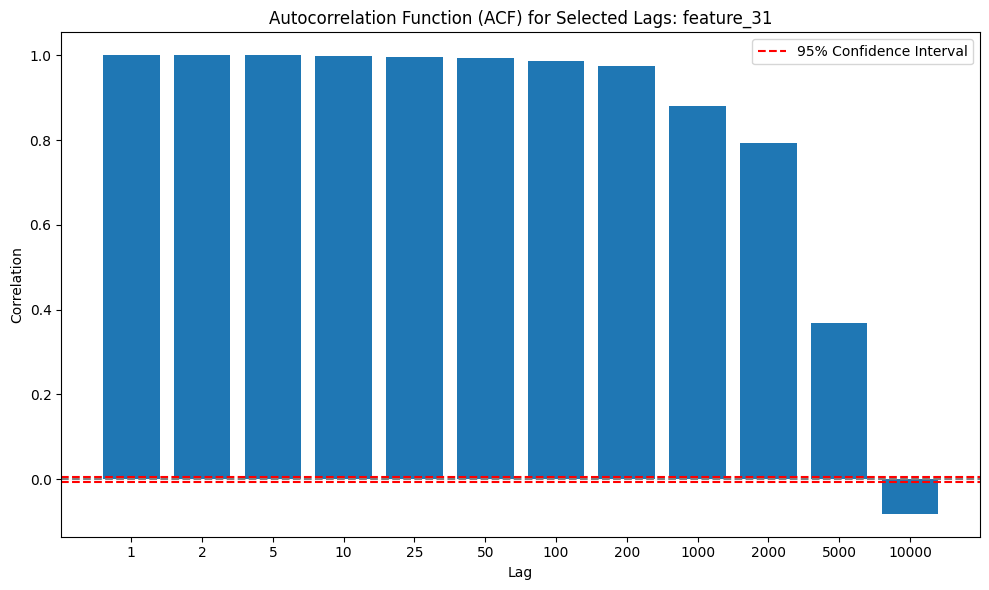

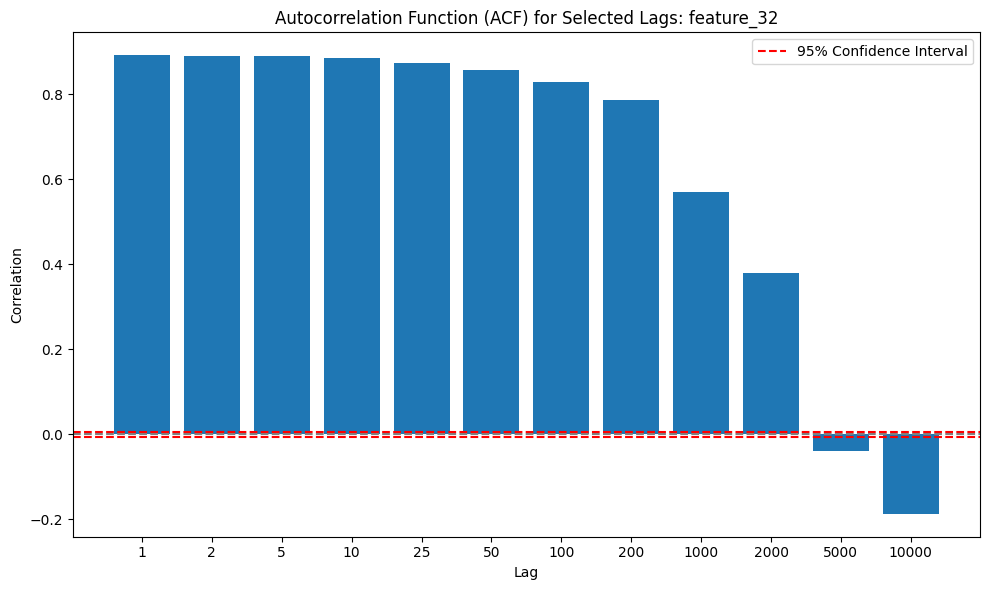

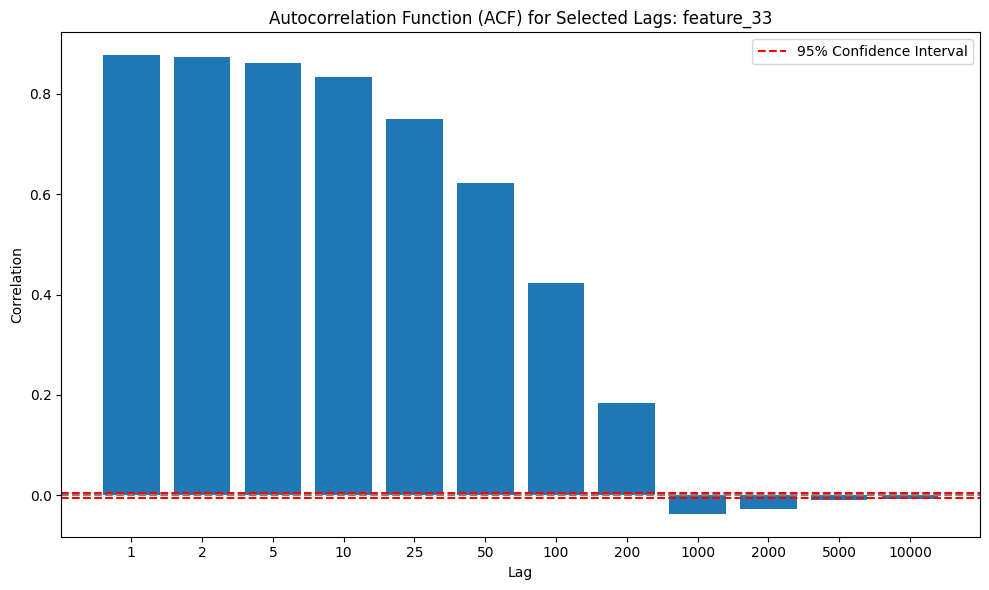

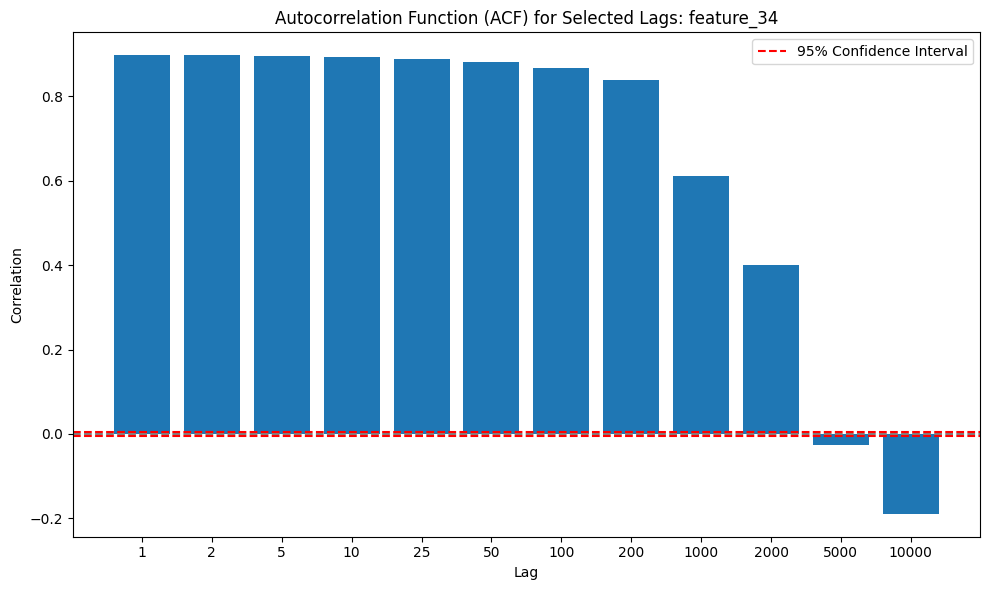

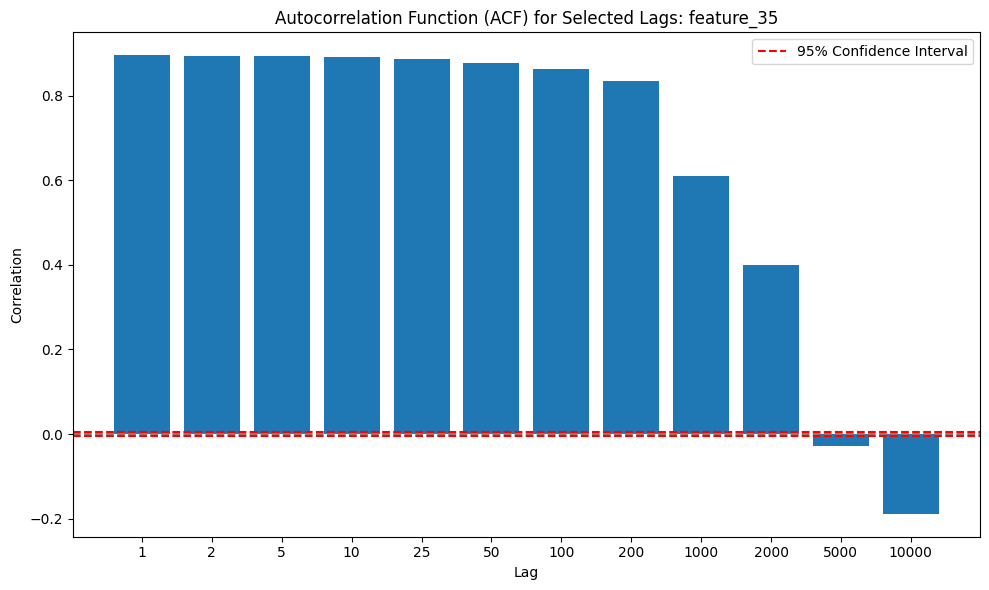

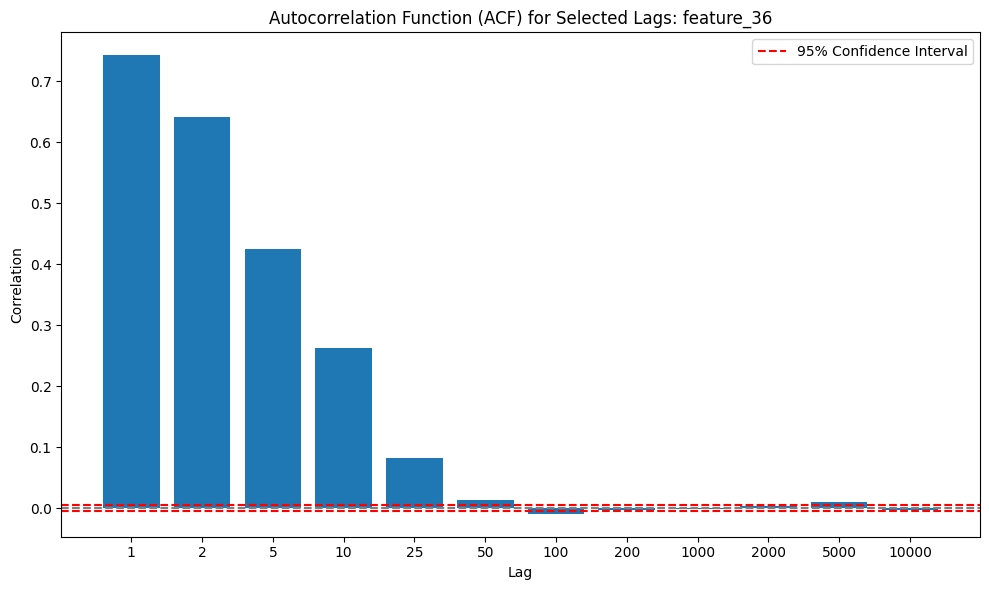

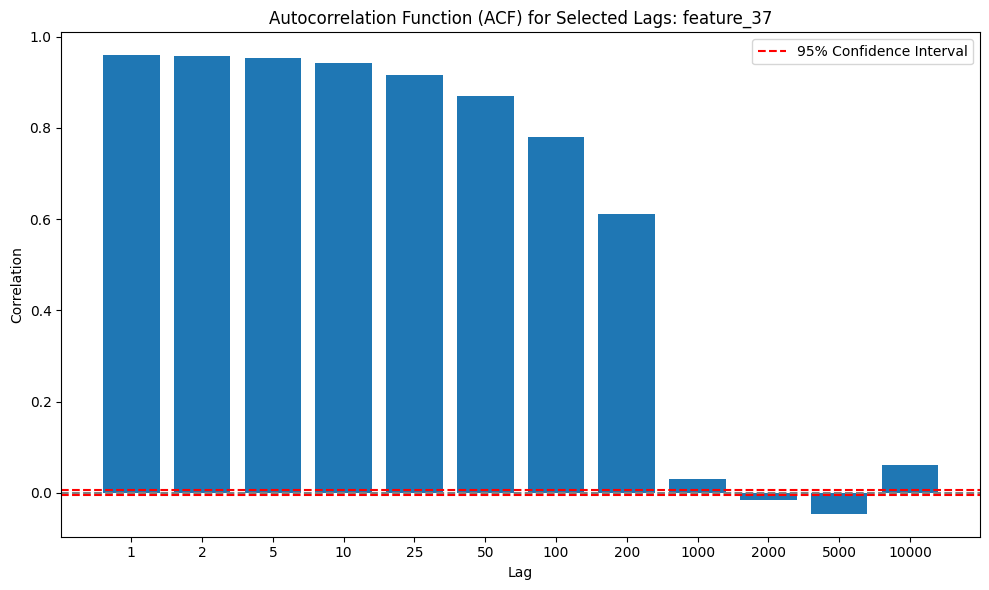

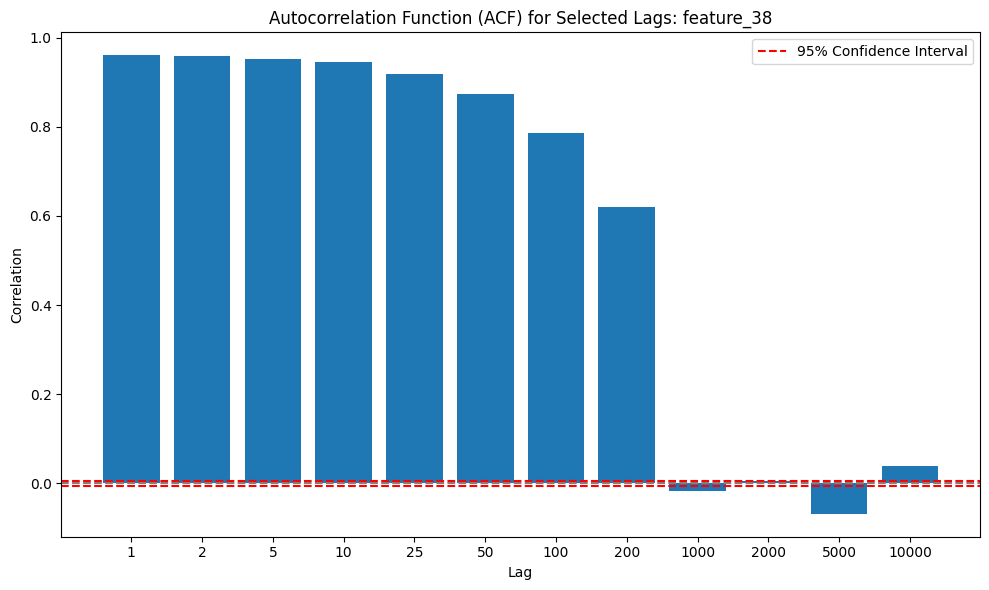

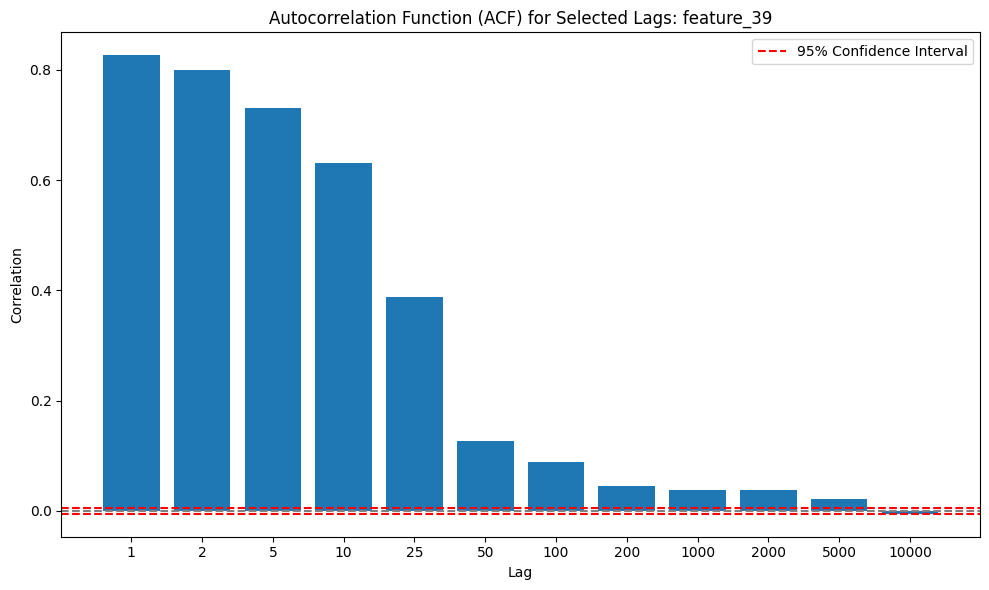

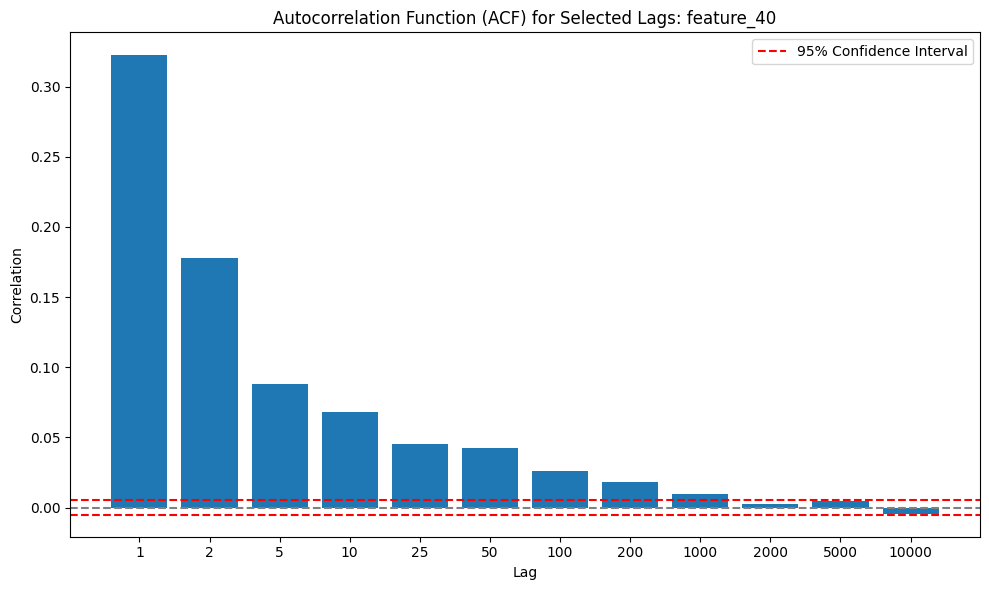

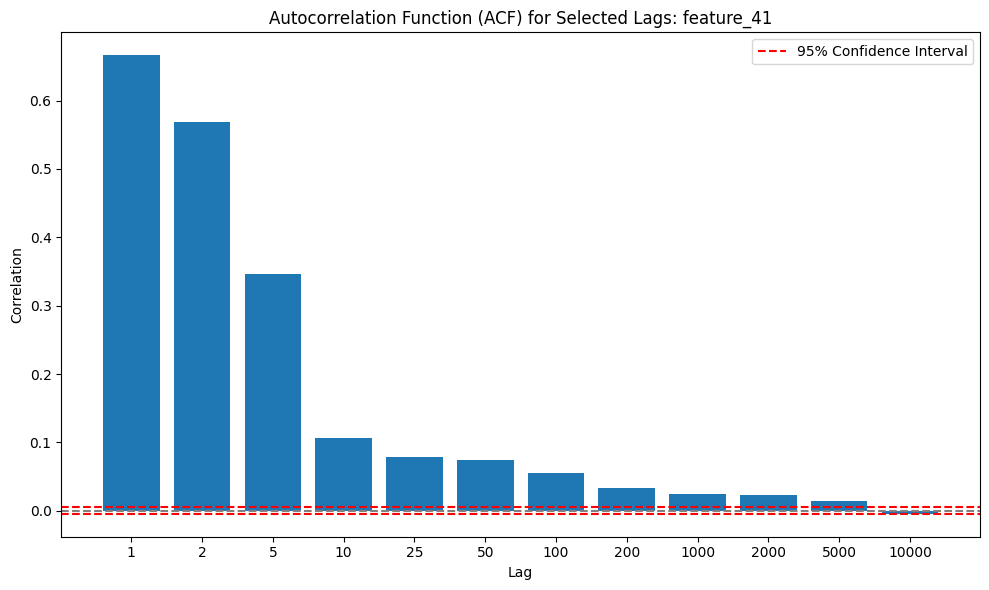

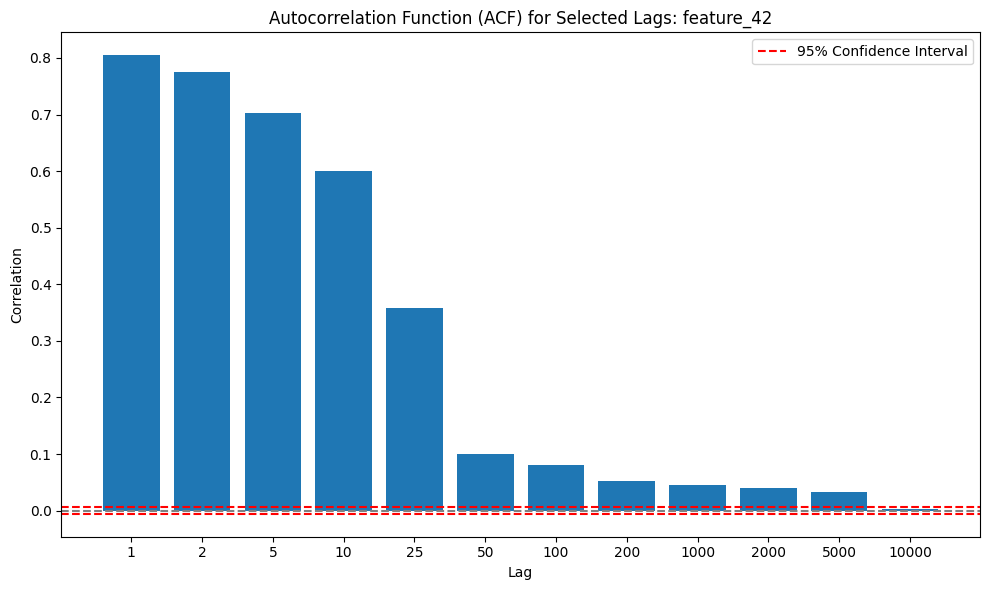

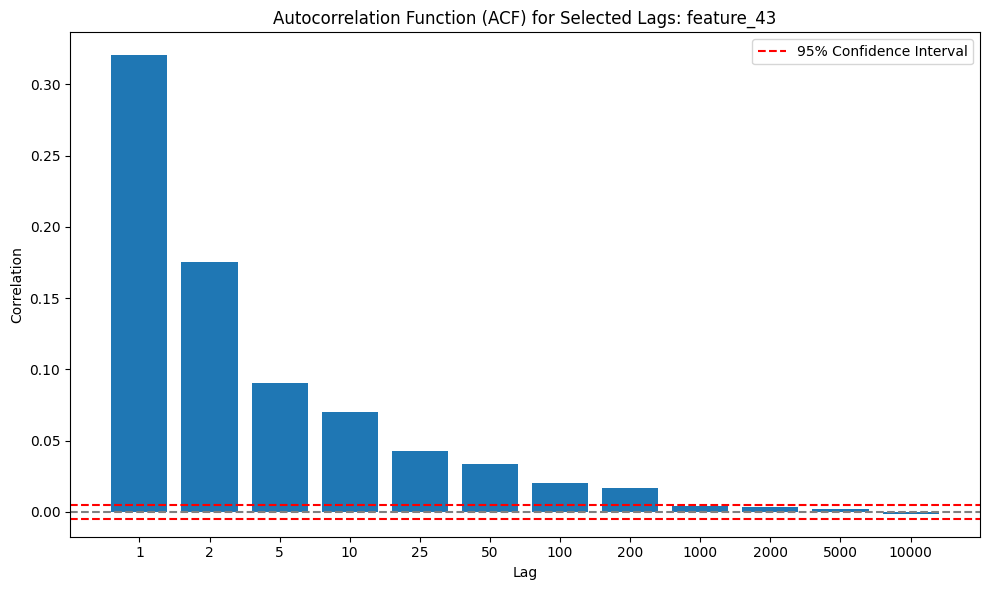

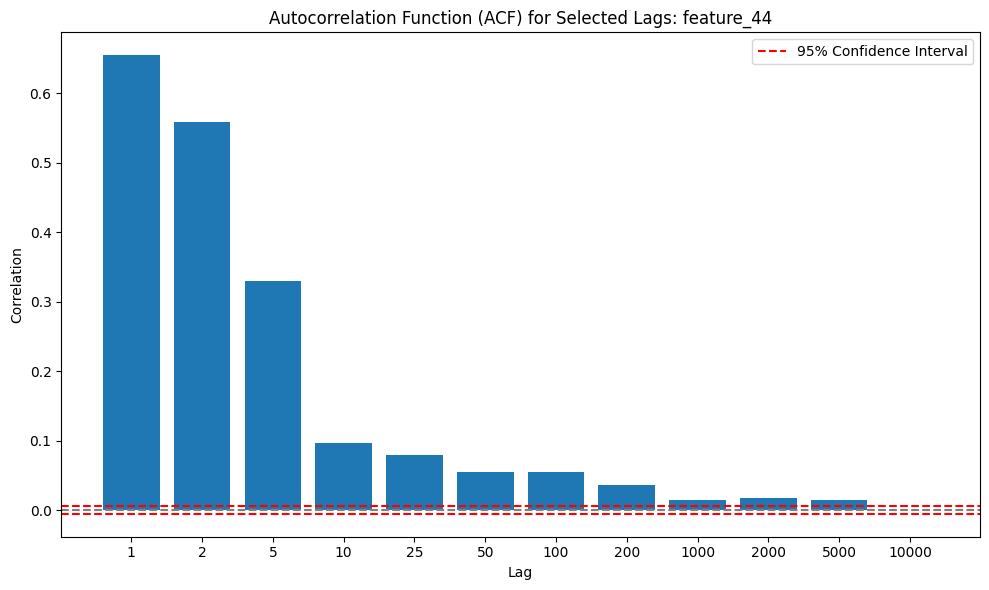

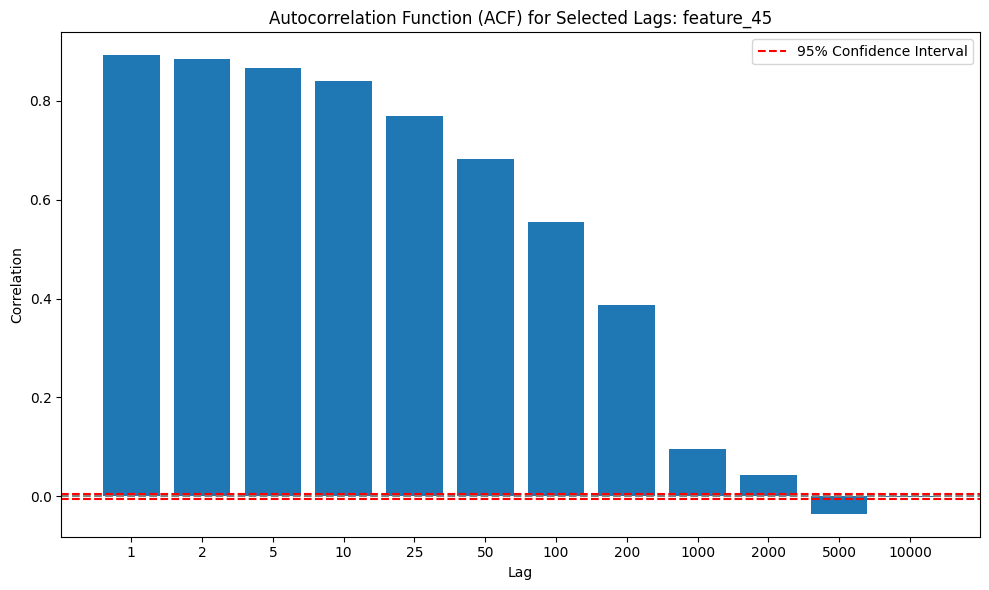

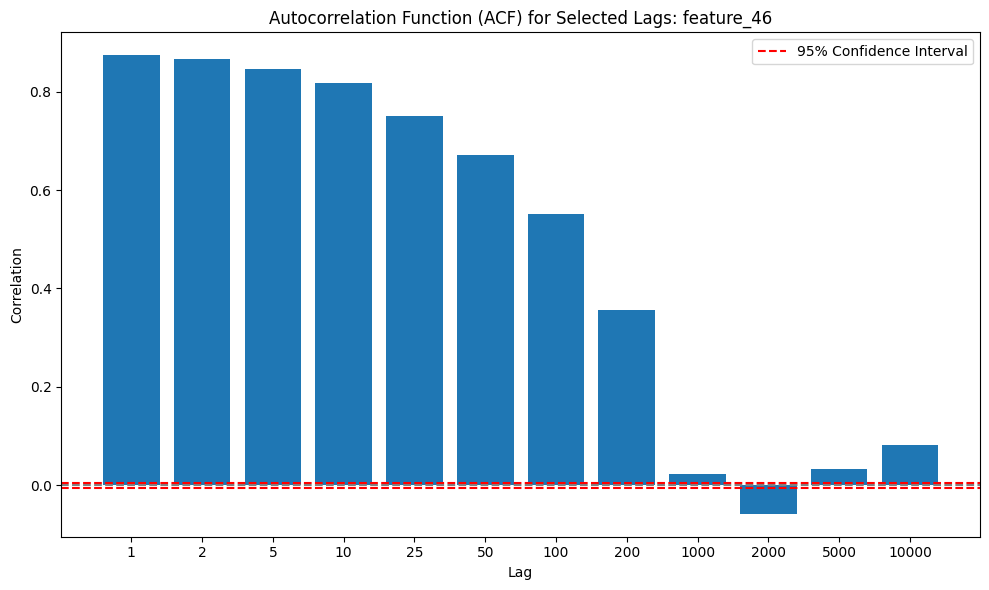

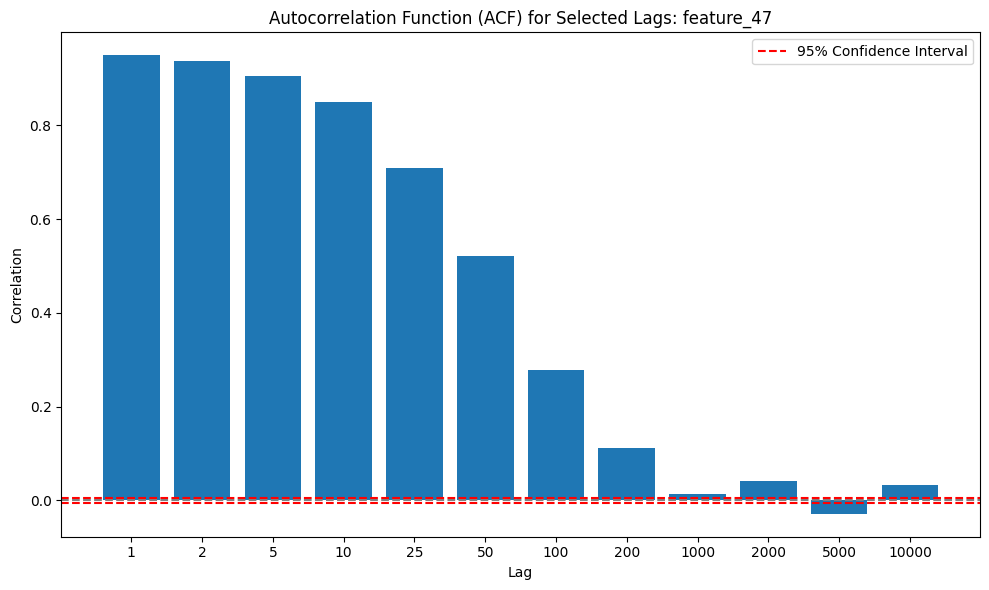

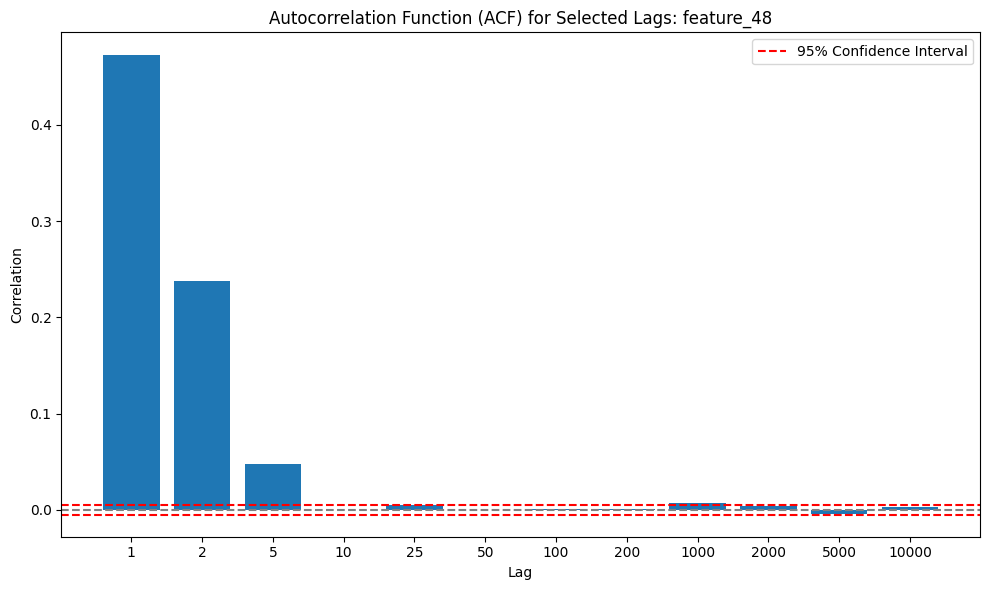

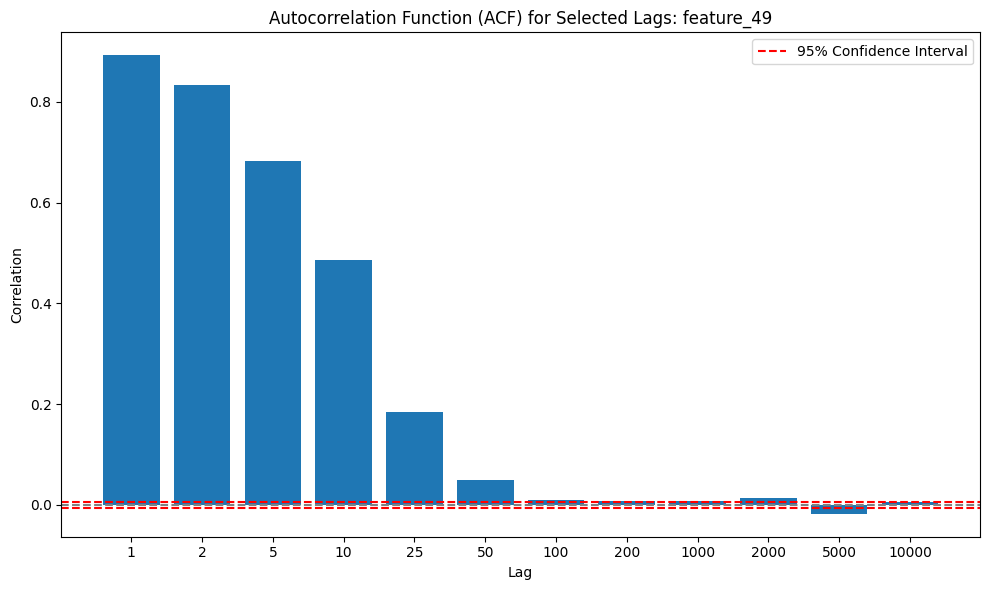

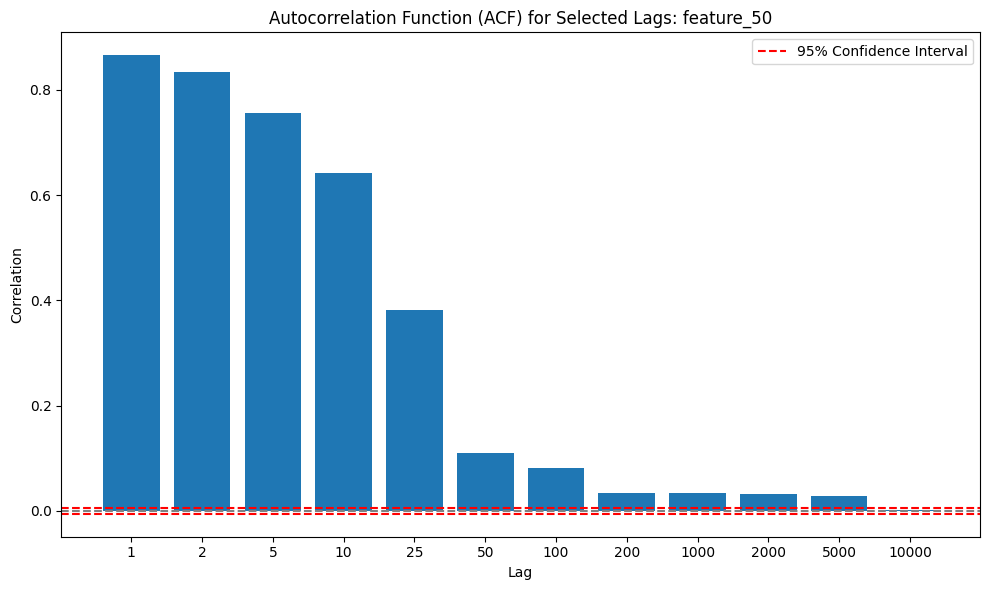

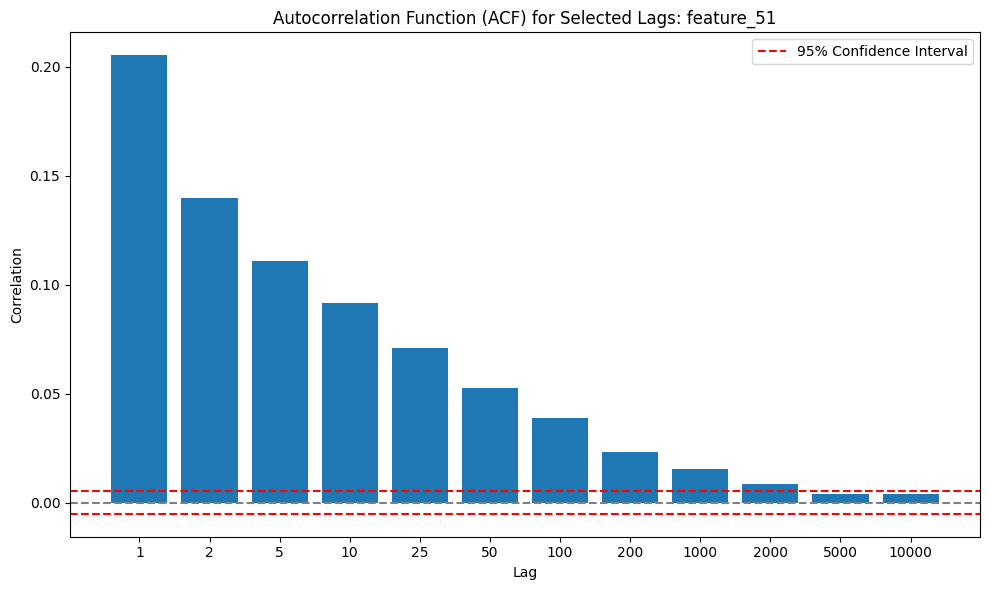

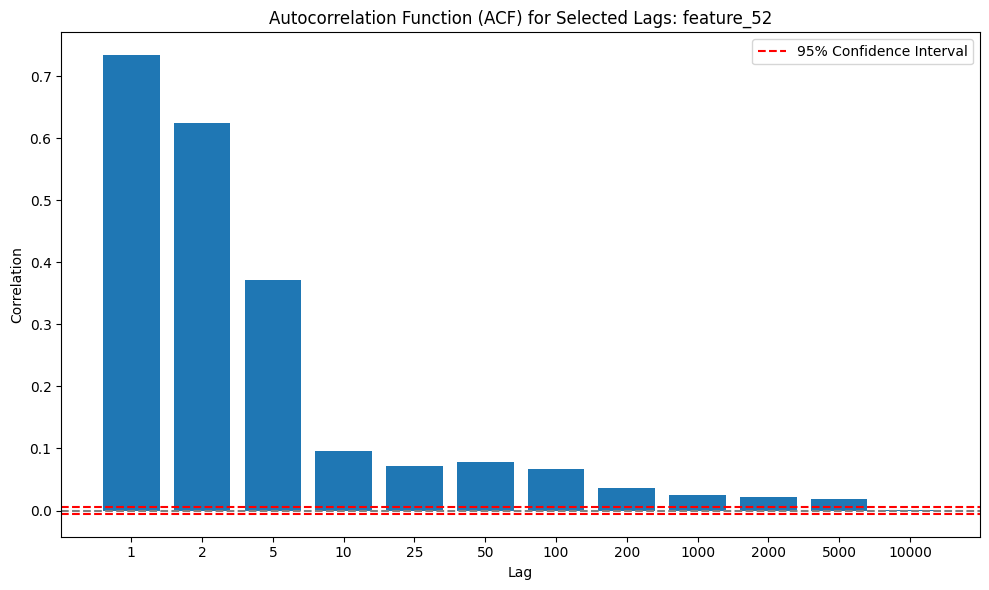

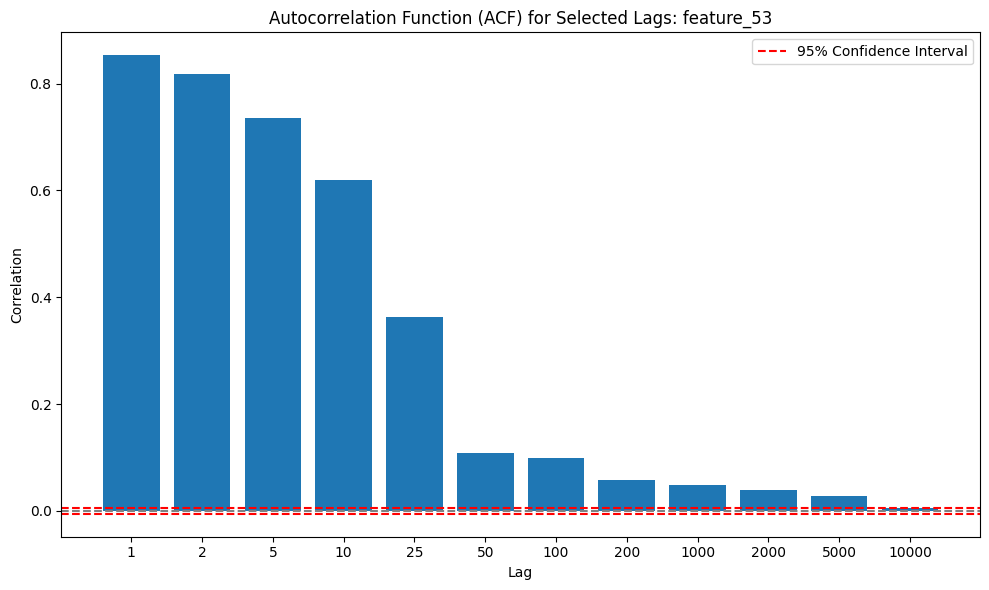

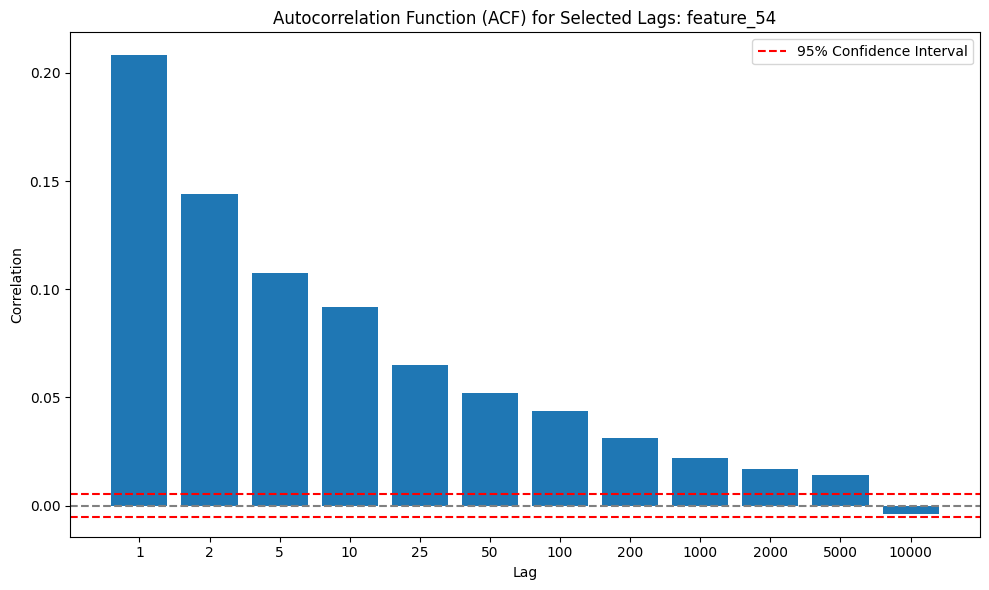

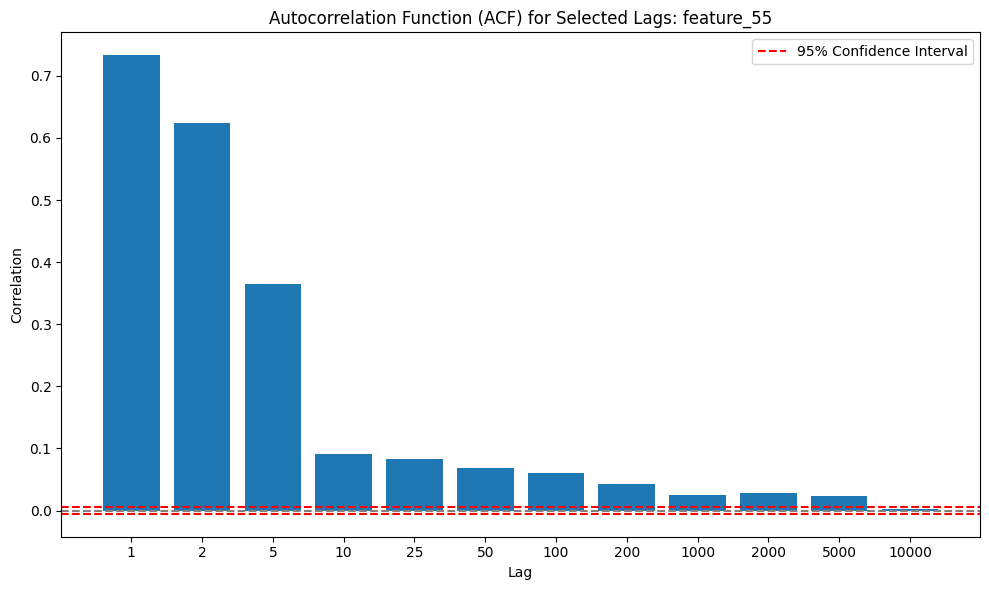

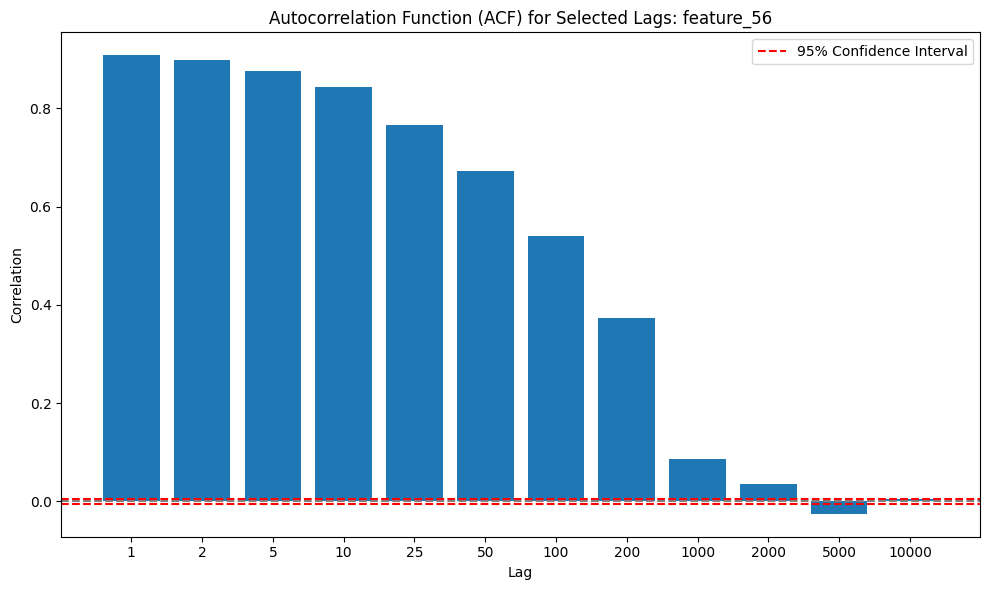

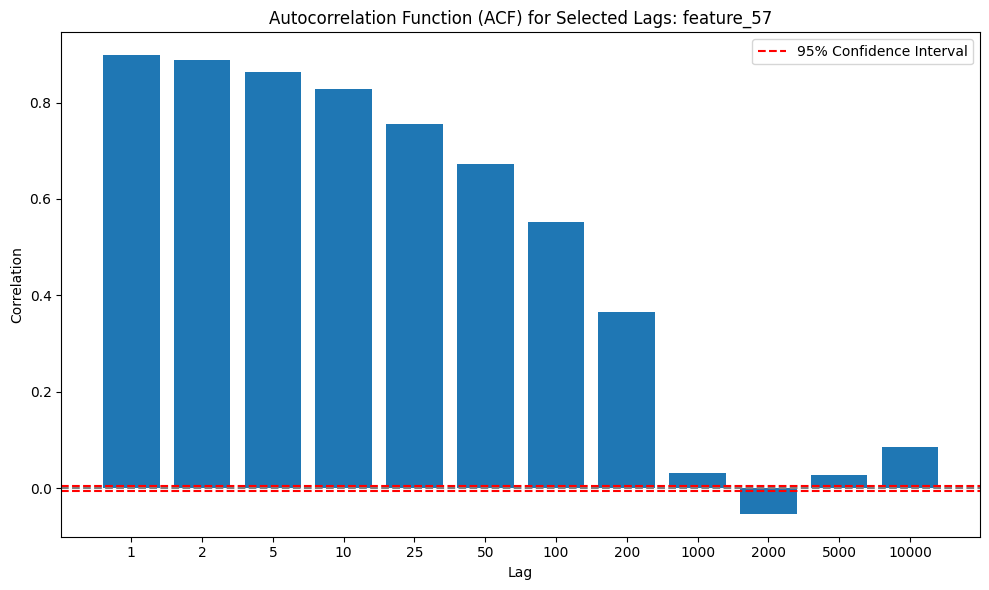

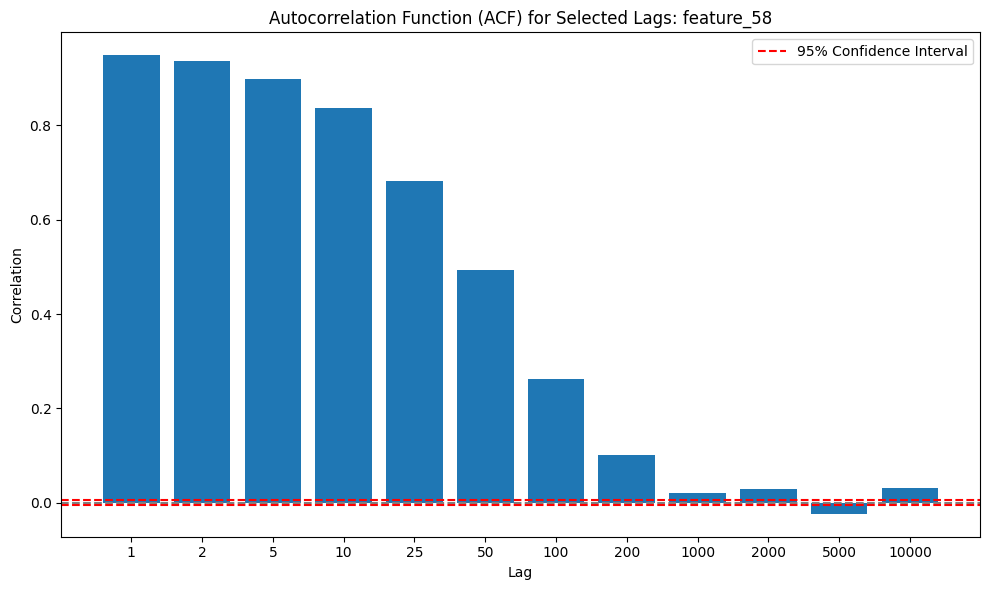

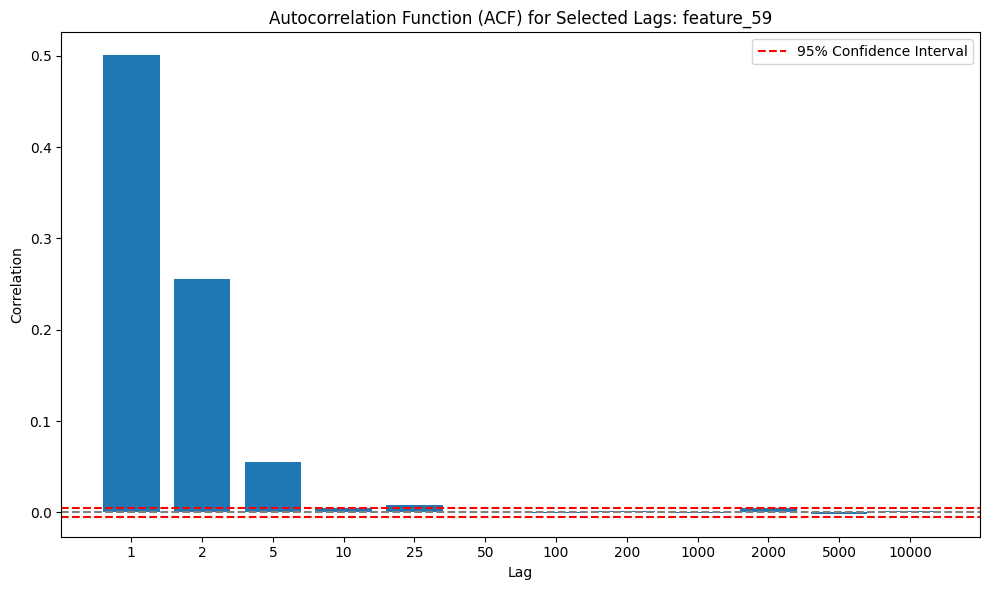

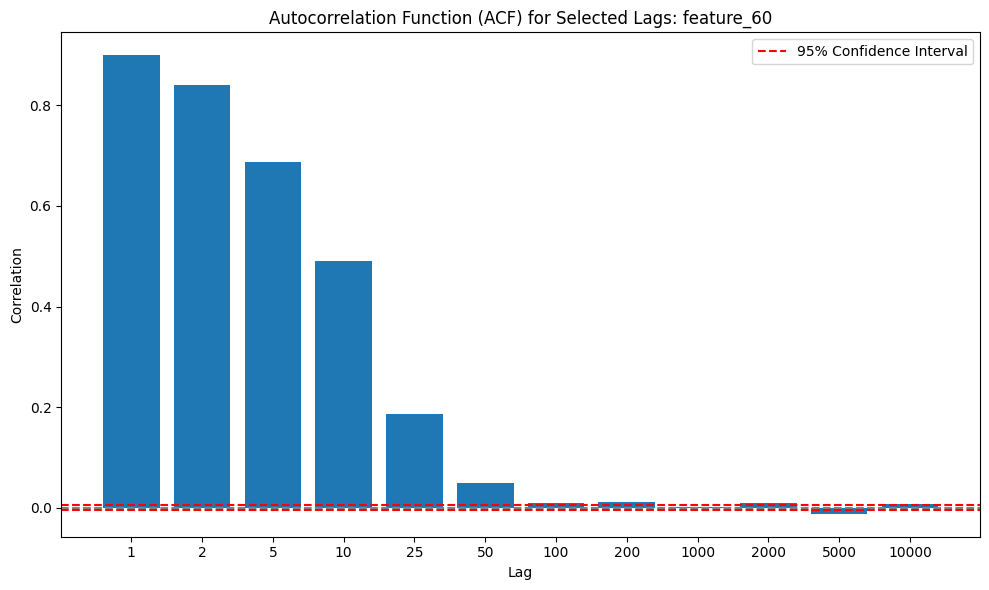

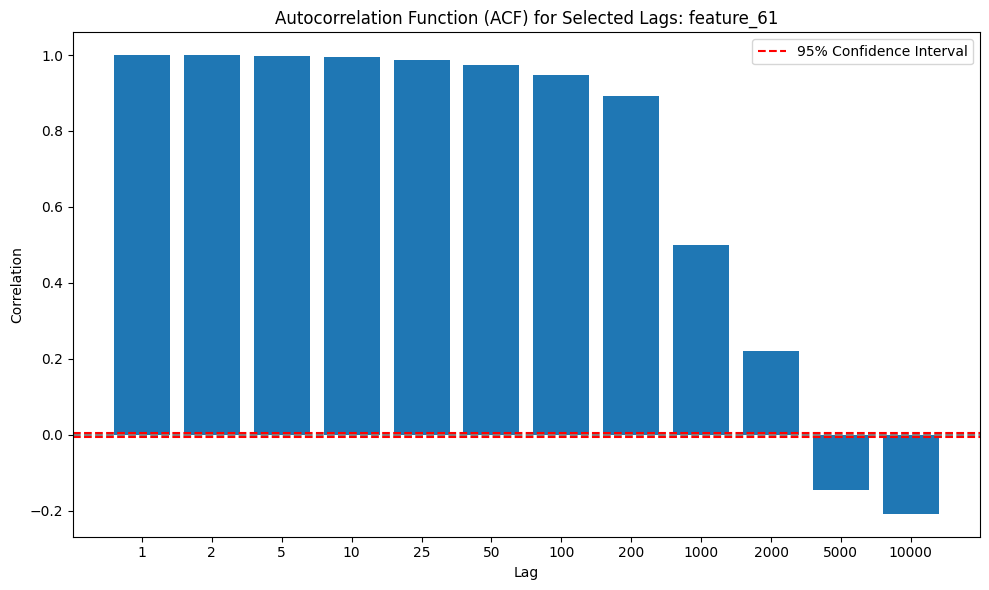

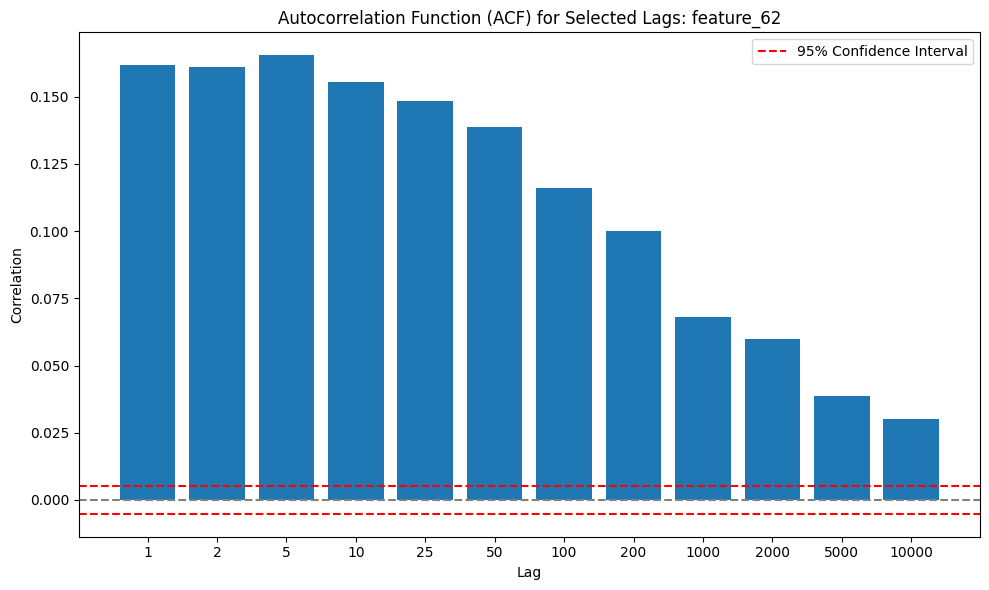

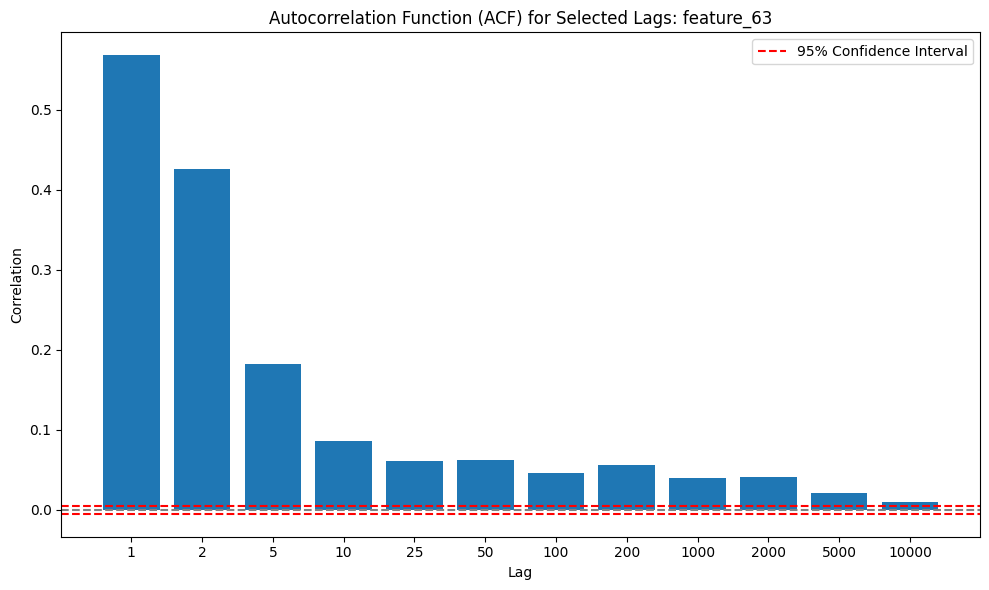

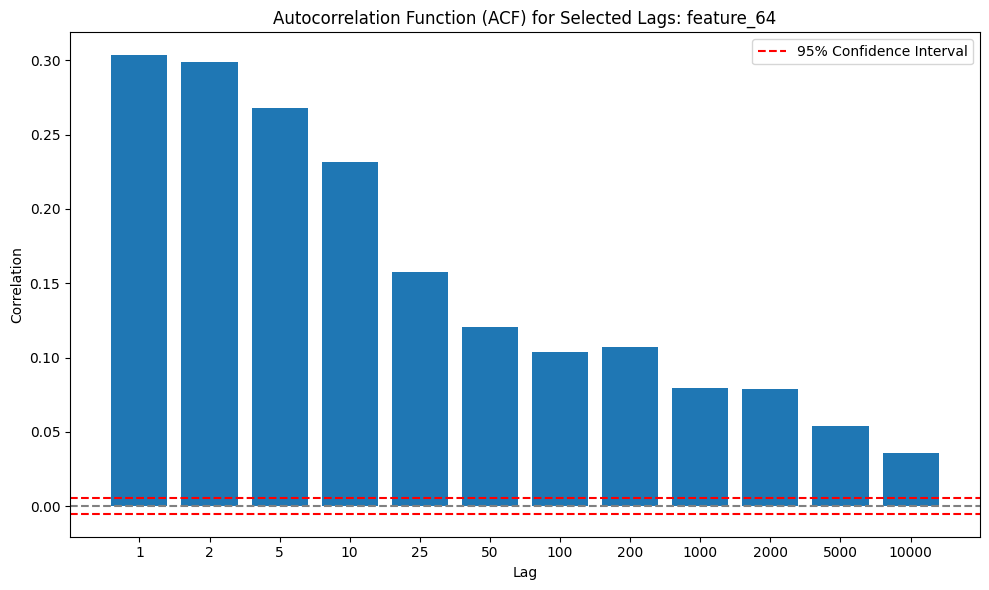

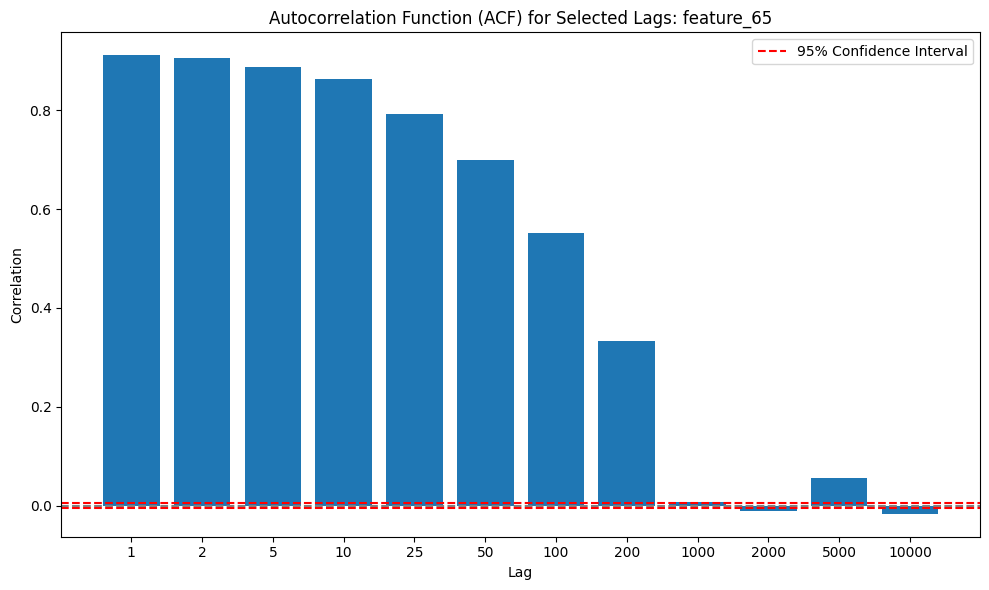

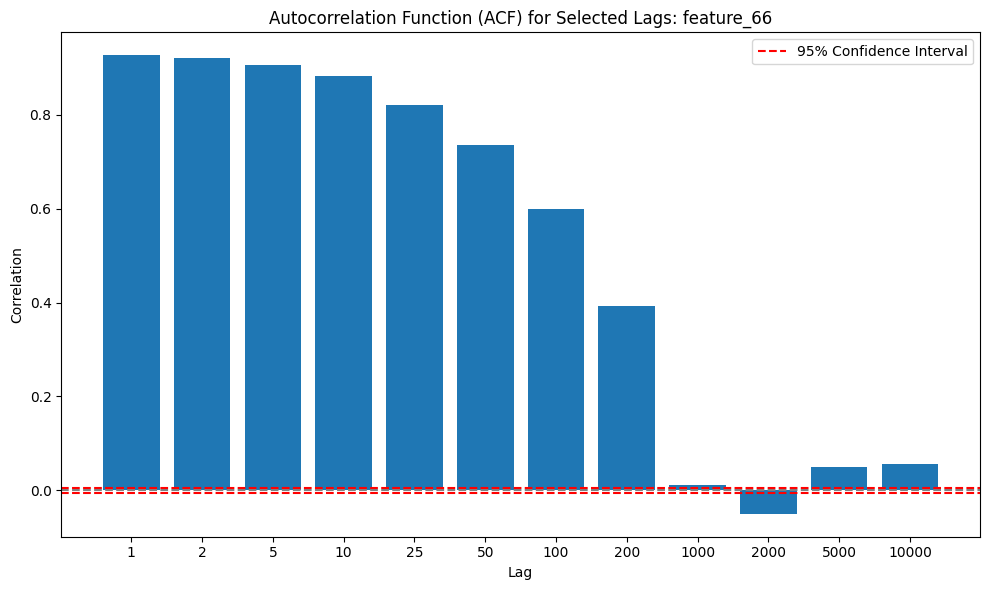

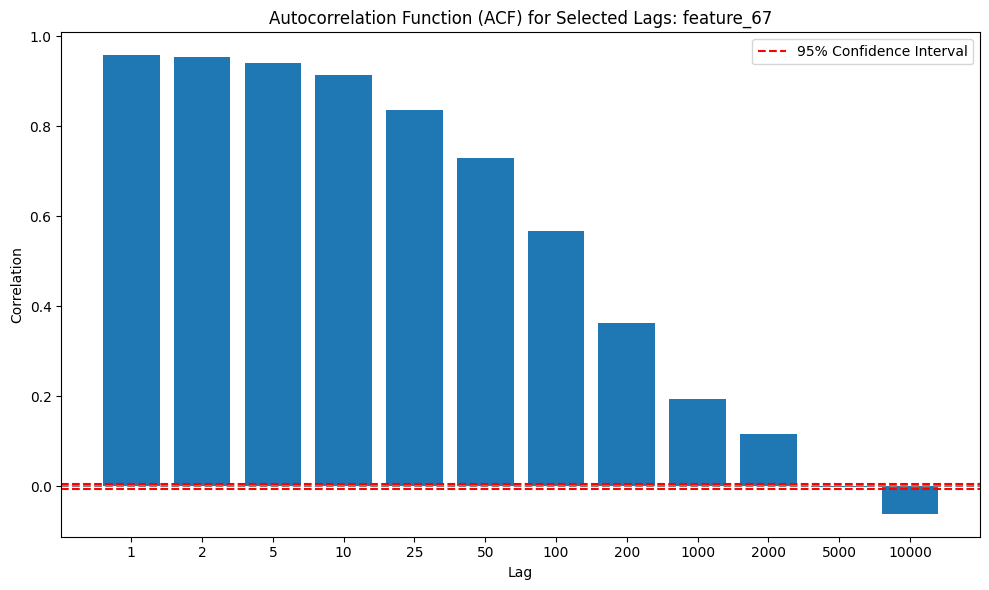

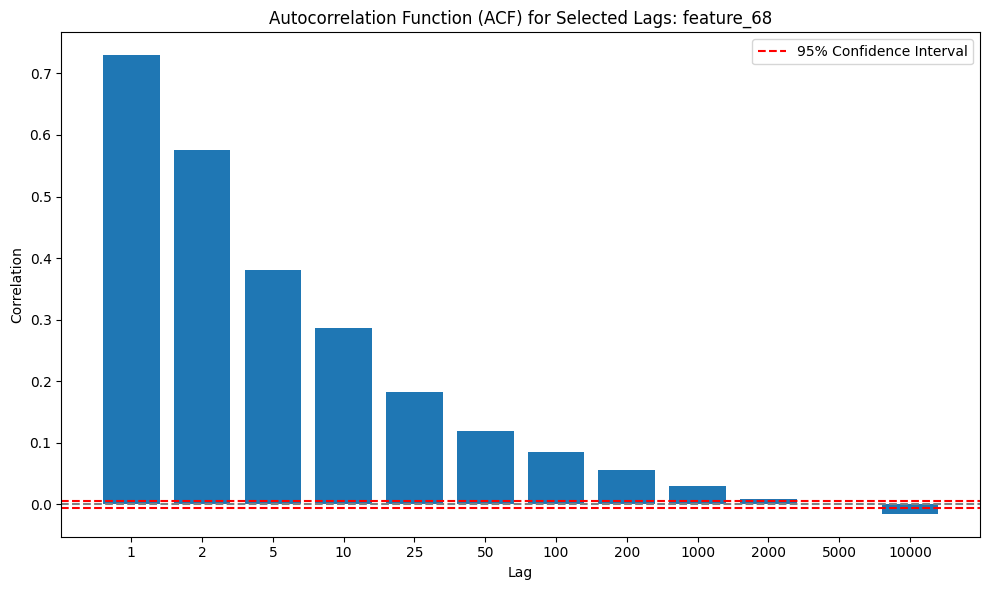

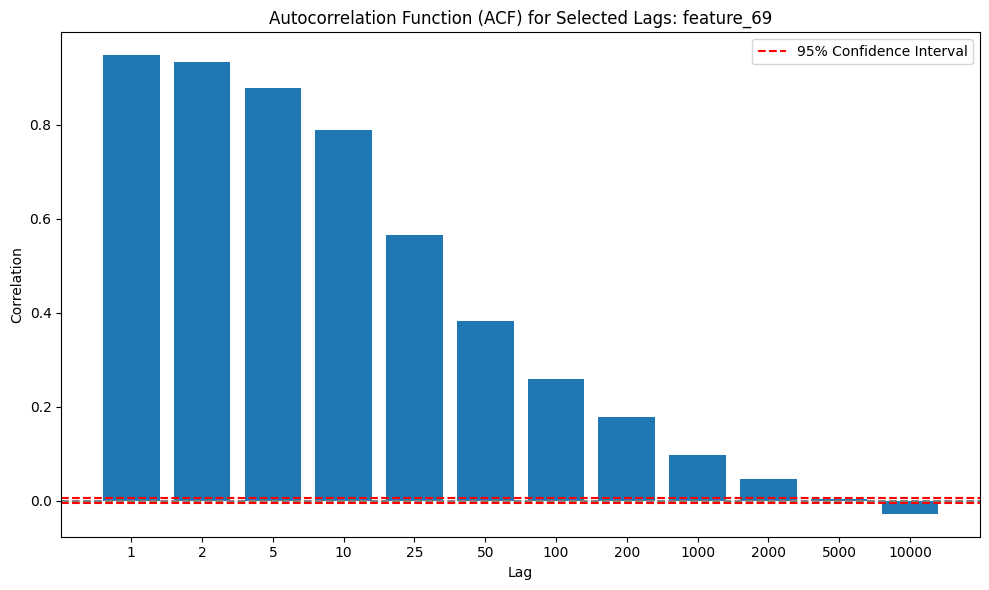

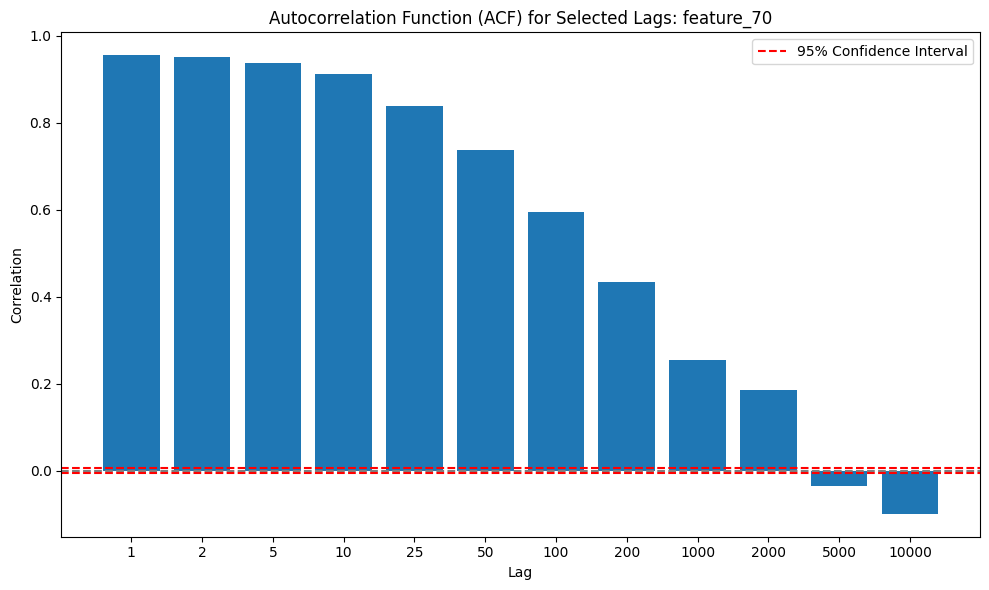

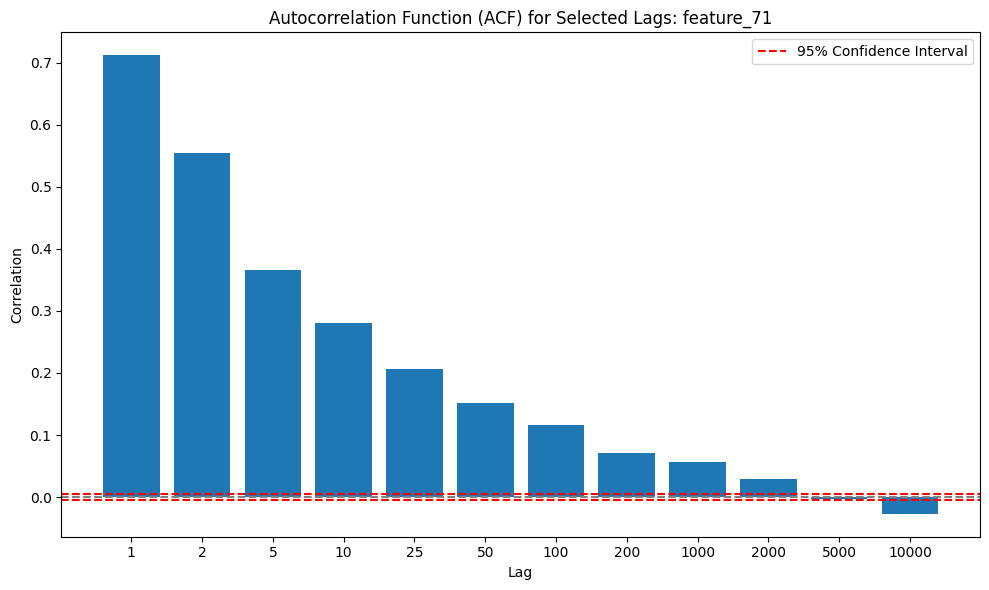

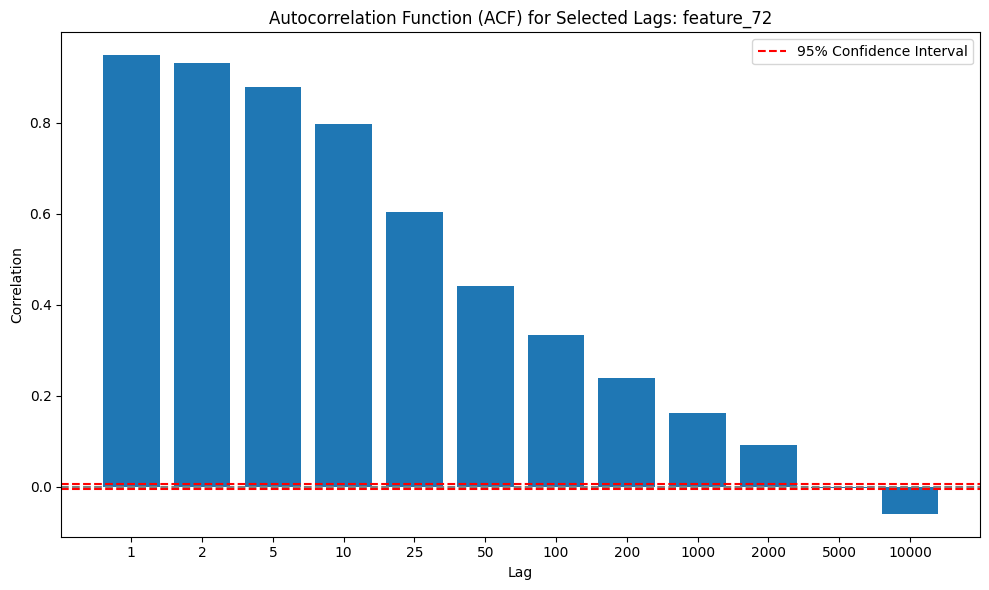

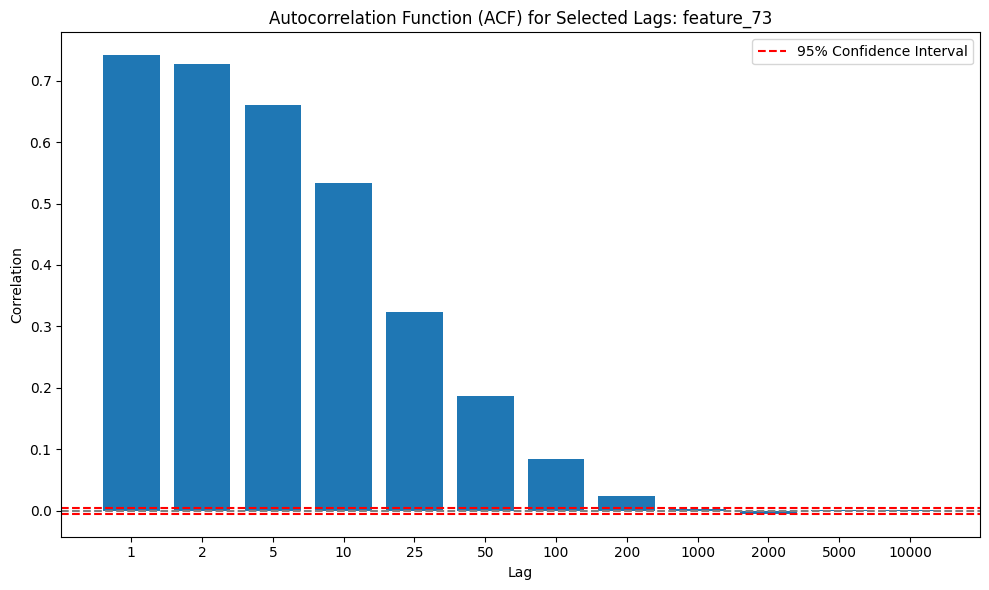

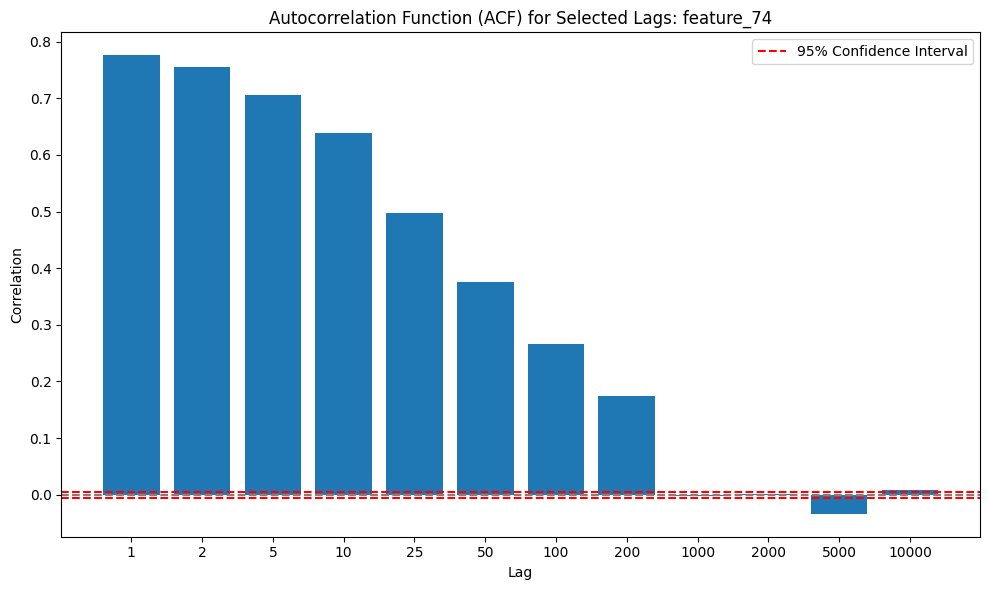

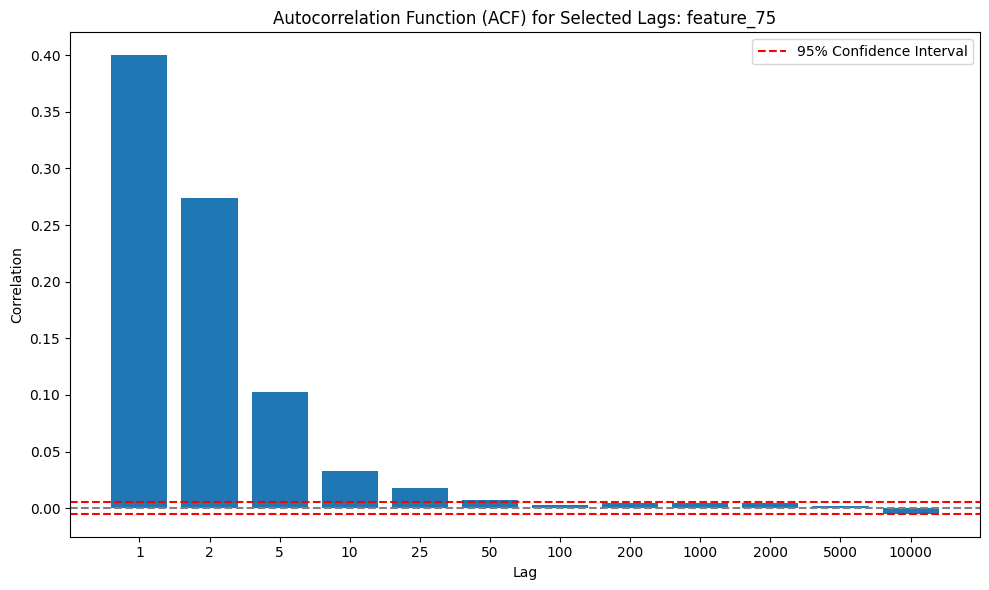

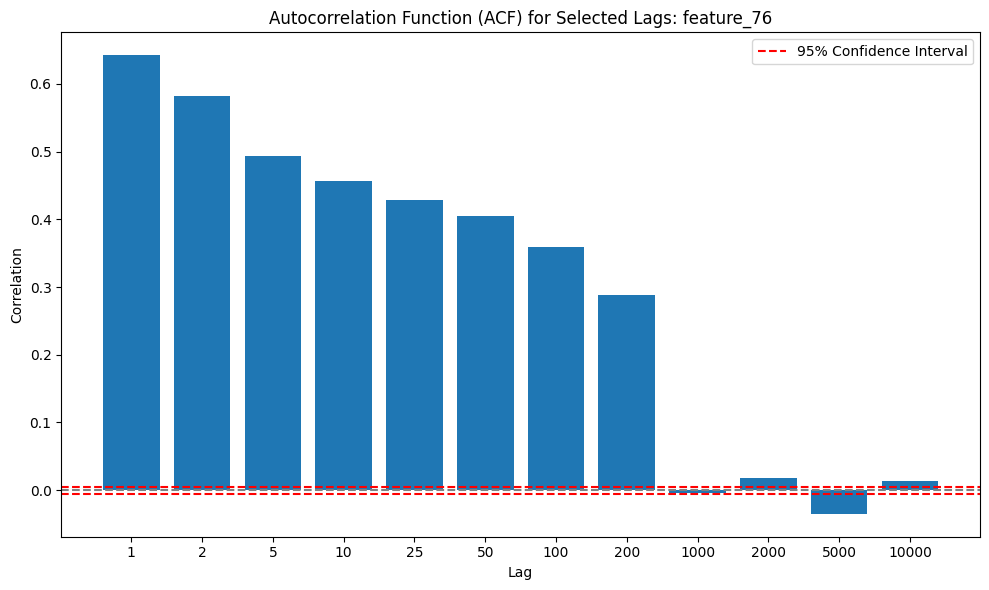

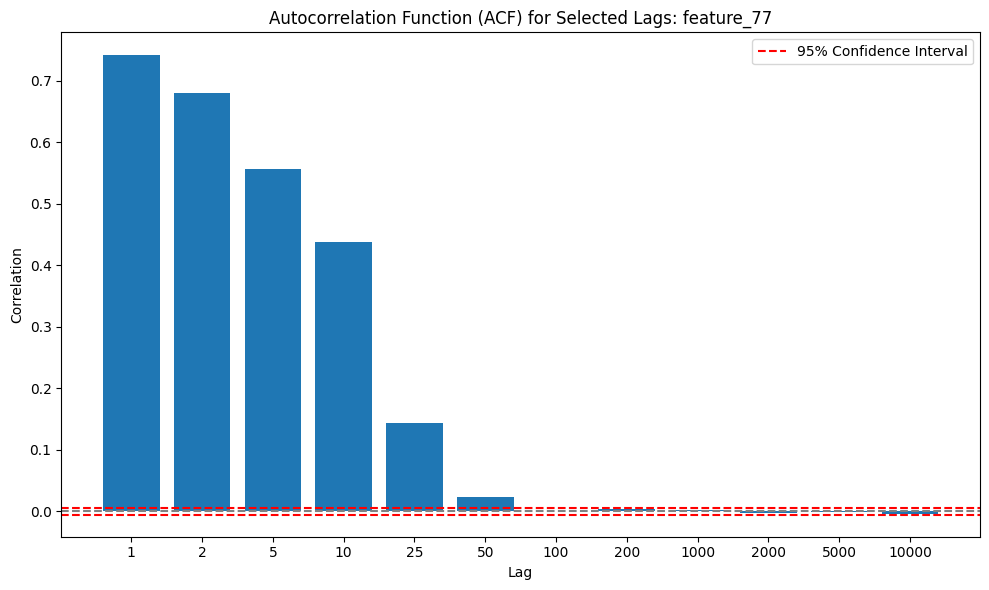

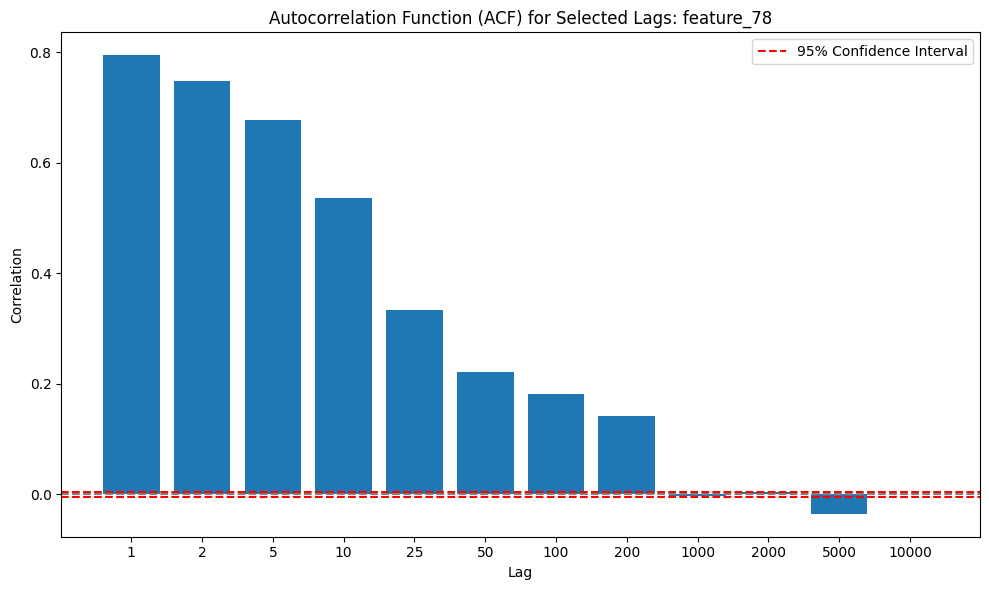

In [187]:
for feature in df.columns[feature_columns]:
    series = pd.Series(df.loc[df['symbol_id']==1, [feature]].to_numpy().reshape(-1))
    acf_values = analyze_time_series(series, [1, 2, 5, 10, 25, 50, 100, 200, 1000, 2000, 5000, 10000], feature_name=feature)

In [ ]:
target_series = series[:10000]

results = fit_arfima(target_series, p=1, d=0.3, q=1)

# ARFIMA 프로세스 시뮬레이션
simulated_data = simulate_arfima(
    n_samples=1000,
    p=1, d=0.3, q=1,
    ar_params=[0.7],
    ma_params=[0.3]
)

<Axes: >

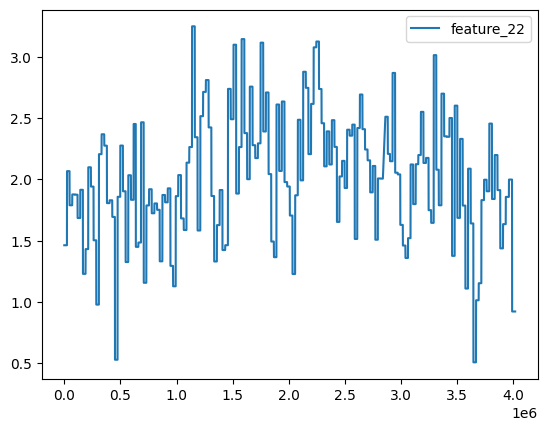

In [ ]:
df.loc[df['symbol_id']==1, ['feature_21']].plot()

<Axes: >

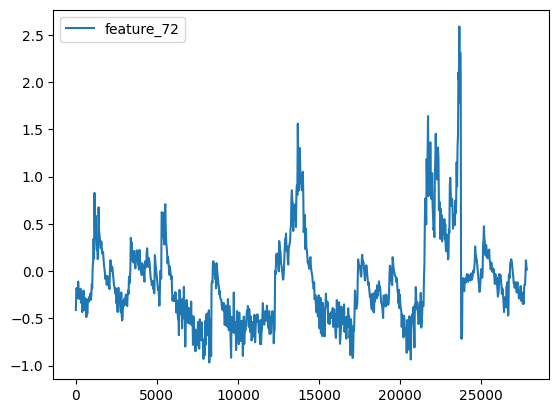

In [31]:
df.loc[df['symbol_id']==1, ['feature_72']][:1000].plot()

<Axes: >

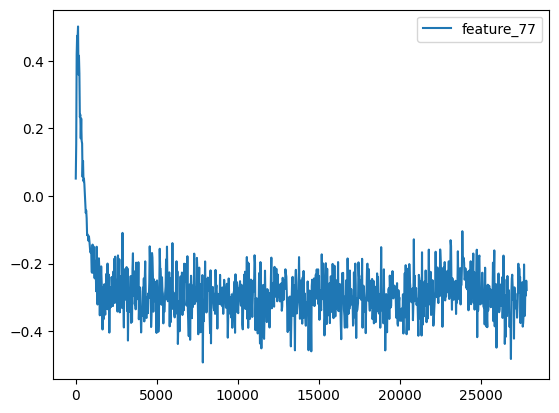

In [26]:
df.loc[df['symbol_id']==1, ['feature_77']][:1000].plot()

<Axes: >

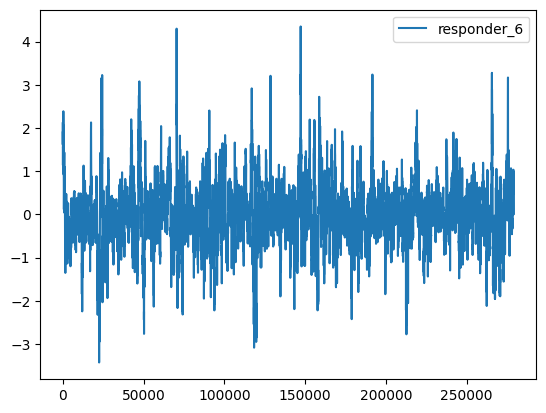

In [32]:
df.loc[df['symbol_id']==1, ['responder_6']][:10000].plot()

<Axes: >

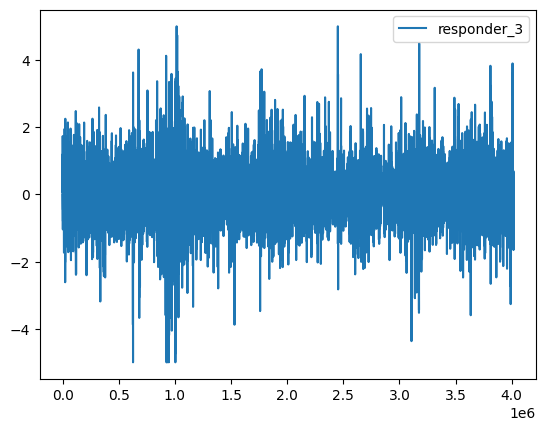

In [59]:
df.loc[df['symbol_id']==1, ['responder_3']].plot()

<Axes: >

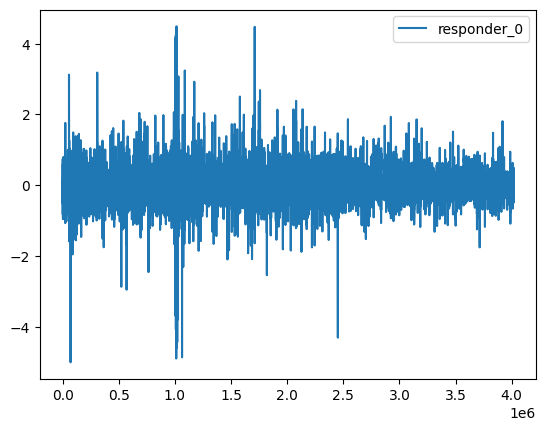

In [60]:
df.loc[df['symbol_id']==1, ['responder_0']].plot()